In [21]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno   # Instalado
from scipy.stats import shapiro, kstest, skew, kurtosis
import numpy as np
from scipy.stats import spearmanr #pip install statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce  #  pip install category_encoders
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline  # Para incluir balanceo

from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
























In [4]:
# Carga de Dataset

file_path = "dataset_timeseries_realista_con_target.csv"
df = pd.read_csv(file_path)

In [5]:
# 1.1 Exploración Inicial Completa


# 2. Información básica
print("📌 Información básica del dataset")
print("Shape (filas, columnas):", df.shape)
print("\nTipos de datos por columna:")
print(df.dtypes)
print("\nUso de memoria:")
print(df.memory_usage(deep=True))

# 3. Primeras y últimas observaciones
print("\n🔹 Primeras filas del dataset:")
print(df.head())

print("\n🔹 Últimas filas del dataset:")
print(df.tail())

# 4. Resumen estadístico completo
print("\n📊 Resumen estadístico de variables numéricas:")
print(df.describe().T)

print("\n📊 Resumen estadístico de variables categóricas:")
print(df.describe(include=['object', 'category']).T)

# 5. Identificación de variables categóricas y numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\n🔎 Variables numéricas:")
print(num_cols)

print("\n🔎 Variables categóricas:")
print(cat_cols)

📌 Información básica del dataset
Shape (filas, columnas): (300000, 13)

Tipos de datos por columna:
patient_id               int64
visit                    int64
age                    float64
gender                  object
smoking_history         object
diabetes                 int64
hypertension             int64
blood_glucose_level      int64
HbA1c_level            float64
systolic_bp              int64
diastolic_bp             int64
bmi                    float64
target                   int64
dtype: object

Uso de memoria:
Index                       128
patient_id              2400000
visit                   2400000
age                     2400000
gender                 18651366
smoking_history        19002702
diabetes                2400000
hypertension            2400000
blood_glucose_level     2400000
HbA1c_level             2400000
systolic_bp             2400000
diastolic_bp            2400000
bmi                     2400000
target                  2400000
dtype: int64

🔹 Pr

📌 Porcentaje de valores faltantes por variable:
Series([], dtype: float64)

📊 Visualización de patrones de valores faltantes:


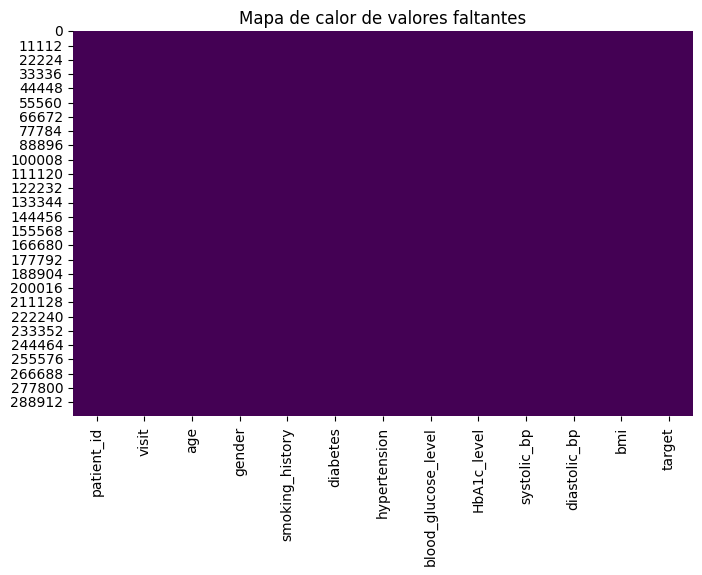

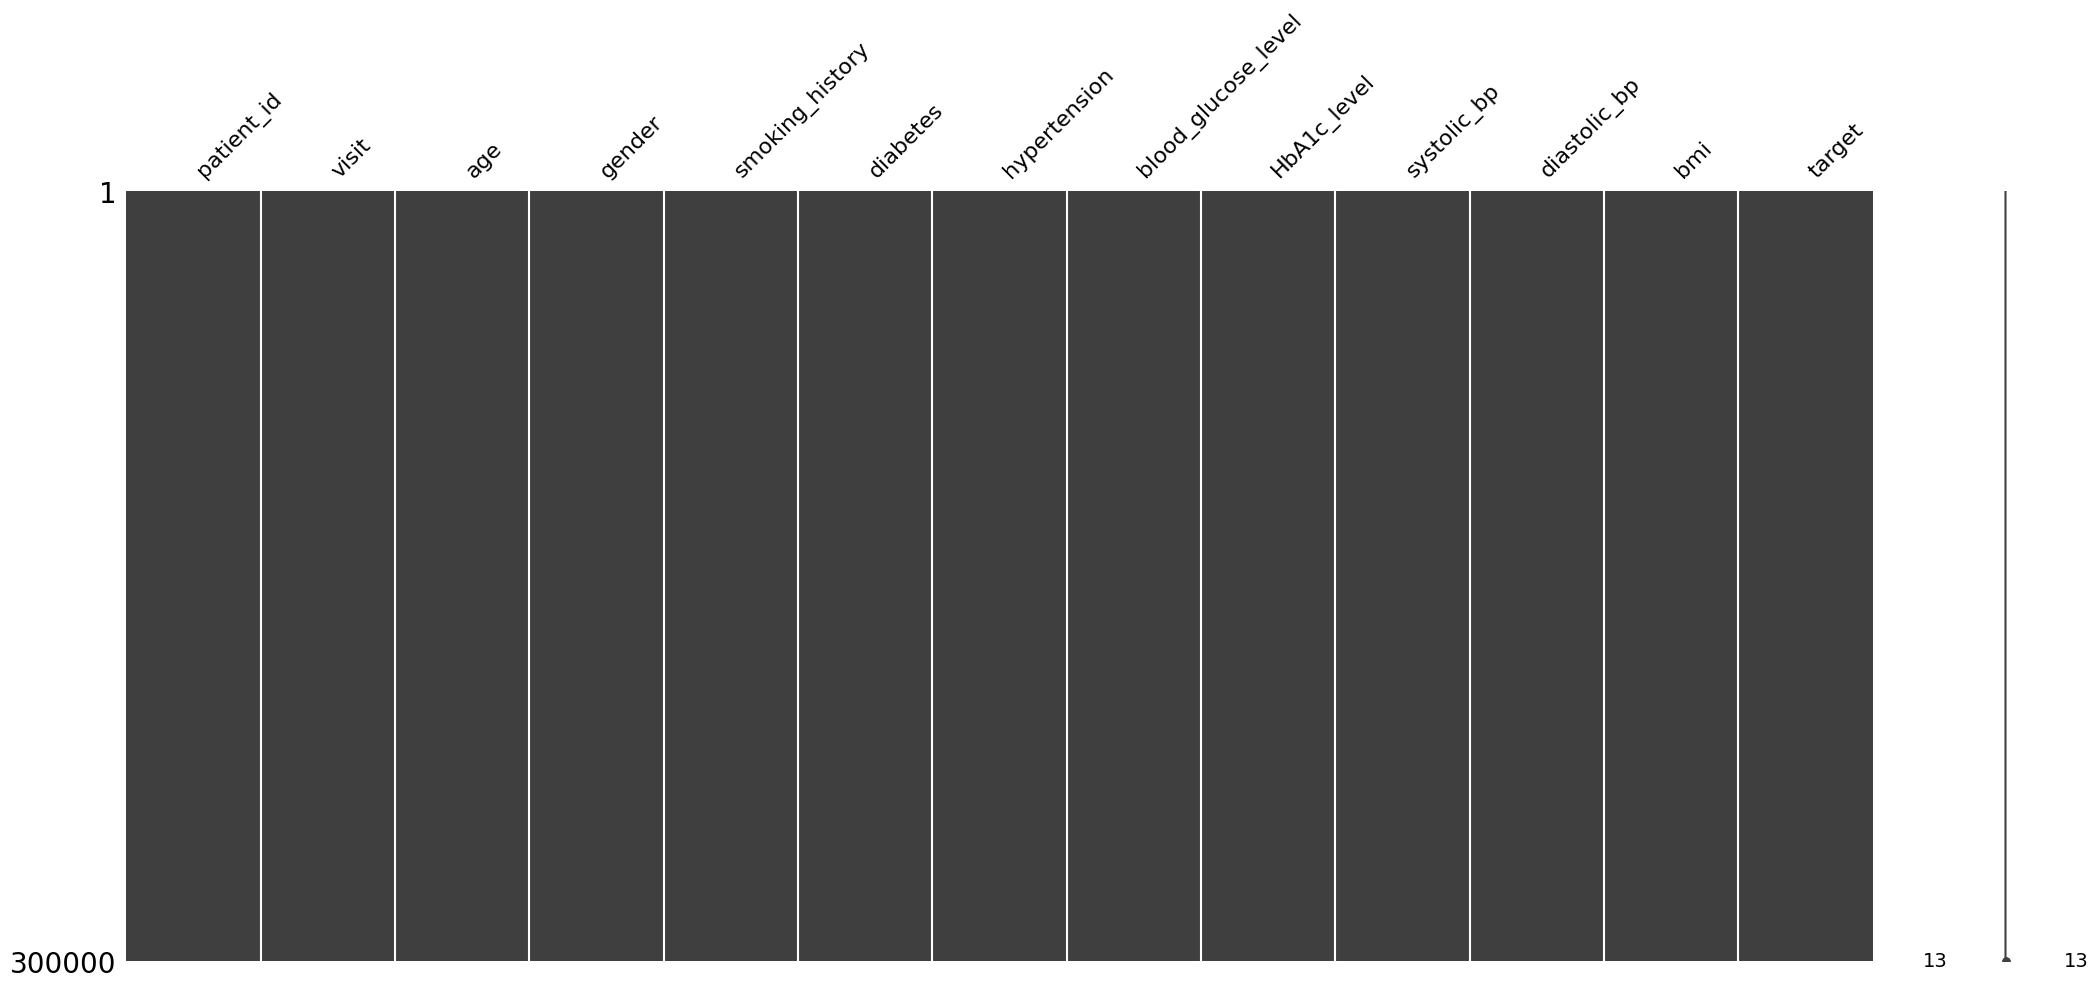

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


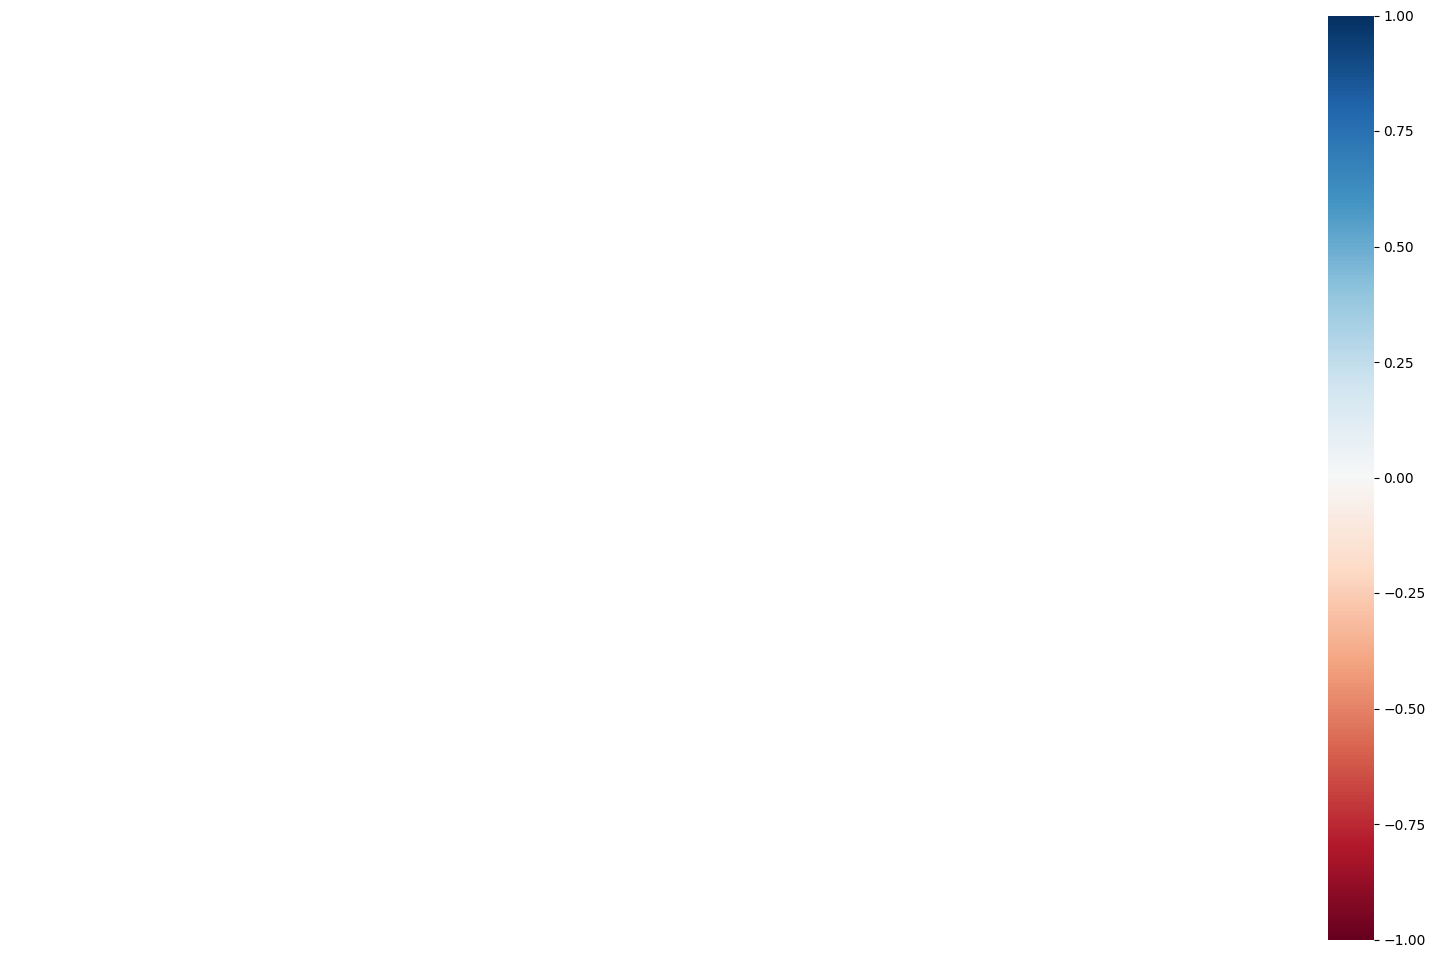


🔎 Análisis de patrones de valores faltantes:
- MCAR (Completamente al azar): si los faltantes se distribuyen sin patrón aparente.
- MAR (Al azar condicional): si los faltantes dependen de otras variables observadas.
- MNAR (No al azar): si los faltantes dependen de la propia variable.

💡 Estrategias de imputación sugeridas:
- Numéricas: media, mediana, interpolación temporal o KNN imputer.
- Categóricas: moda o imputación por categoría más frecuente.
- Series de tiempo: forward fill (ffill), backward fill (bfill) o interpolación lineal.

📌 Registros duplicados exactos: 0
📌 Registros duplicados parciales (por paciente y visita): 0

💡 Estrategias para tratar duplicados:
- Eliminar duplicados exactos.
- En near-duplicates: conservar el registro más reciente o hacer promedio de mediciones.
- Documentar la regla aplicada para consistencia del modelo.


In [6]:
#1.2 Análisis de Calidad de Datos#

# ============================
# 1.2 Detección y análisis de valores faltantes y duplicados
# ============================


# ============================
# DETECCIÓN DE VALORES FALTANTES
# ============================

print("📌 Porcentaje de valores faltantes por variable:")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Visualización de missing patterns
print("\n📊 Visualización de patrones de valores faltantes:")
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

# ============================
# ANÁLISIS DE PATRONES
# ============================
print("\n🔎 Análisis de patrones de valores faltantes:")
print("- MCAR (Completamente al azar): si los faltantes se distribuyen sin patrón aparente.")
print("- MAR (Al azar condicional): si los faltantes dependen de otras variables observadas.")
print("- MNAR (No al azar): si los faltantes dependen de la propia variable.")

# ============================
# ESTRATEGIAS DE IMPUTACIÓN
# ============================
print("\n💡 Estrategias de imputación sugeridas:")
print("- Numéricas: media, mediana, interpolación temporal o KNN imputer.")
print("- Categóricas: moda o imputación por categoría más frecuente.")
print("- Series de tiempo: forward fill (ffill), backward fill (bfill) o interpolación lineal.")

# ============================
# DETECCIÓN DE DUPLICADOS
# ============================

# Duplicados exactos
exact_duplicates = df.duplicated().sum()
print(f"\n📌 Registros duplicados exactos: {exact_duplicates}")

# Near-duplicates: duplicados en variables clave (ejemplo: id paciente y visita)
if "patient_id" in df.columns and "visit" in df.columns:
    near_duplicates = df.duplicated(subset=["patient_id", "visit"]).sum()
    print(f"📌 Registros duplicados parciales (por paciente y visita): {near_duplicates}")
else:
    print("⚠️ No se detectaron columnas clave (patient_id, visit) para near-duplicates.")

# ============================
# ESTRATEGIAS DE RESOLUCIÓN
# ============================
print("\n💡 Estrategias para tratar duplicados:")
print("- Eliminar duplicados exactos.")
print("- En near-duplicates: conservar el registro más reciente o hacer promedio de mediciones.")
print("- Documentar la regla aplicada para consistencia del modelo.")


===== 📊 Análisis de Variables Numéricas =====


🔹 Variable: patient_id
   Media = 49999.50, Mediana = 49999.50, Moda = 0.00
   Desviación estándar = 28867.56, IQR = 49999.50, CV = 0.58
   Asimetría = 0.00, Curtosis = -1.20
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


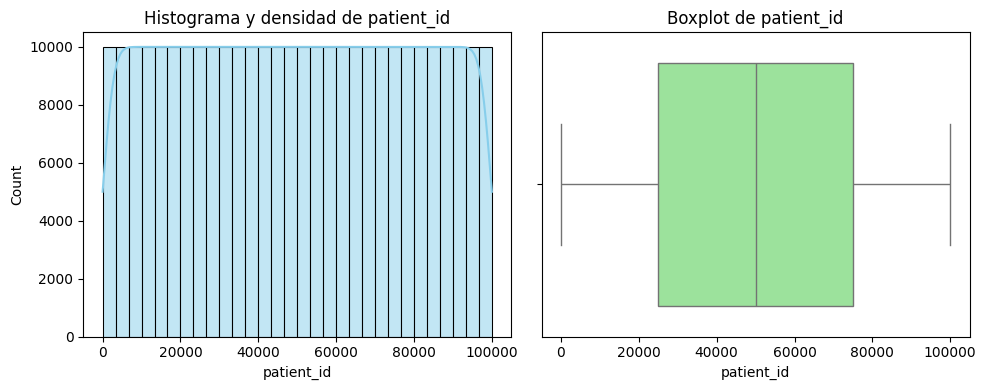


🔹 Variable: visit
   Media = 2.00, Mediana = 2.00, Moda = 1.00
   Desviación estándar = 0.82, IQR = 2.00, CV = 0.41
   Asimetría = 0.00, Curtosis = -1.50
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


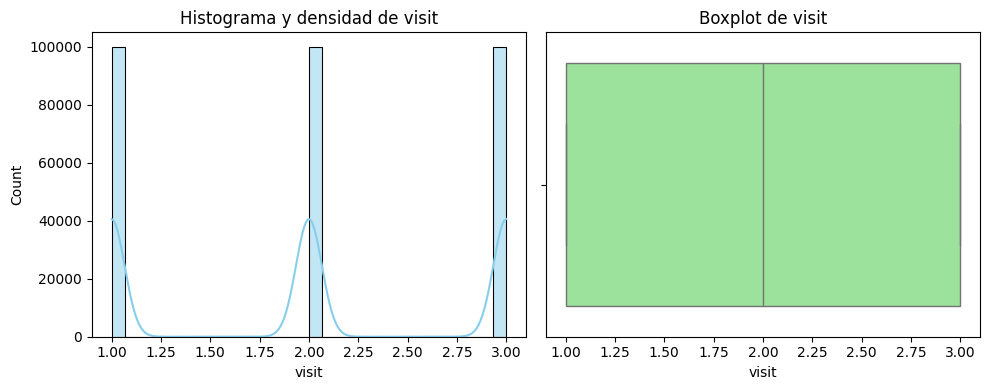


🔹 Variable: age
   Media = 41.89, Mediana = 43.00, Moda = 80.00
   Desviación estándar = 22.52, IQR = 36.00, CV = 0.54
   Asimetría = -0.05, Curtosis = -1.00
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


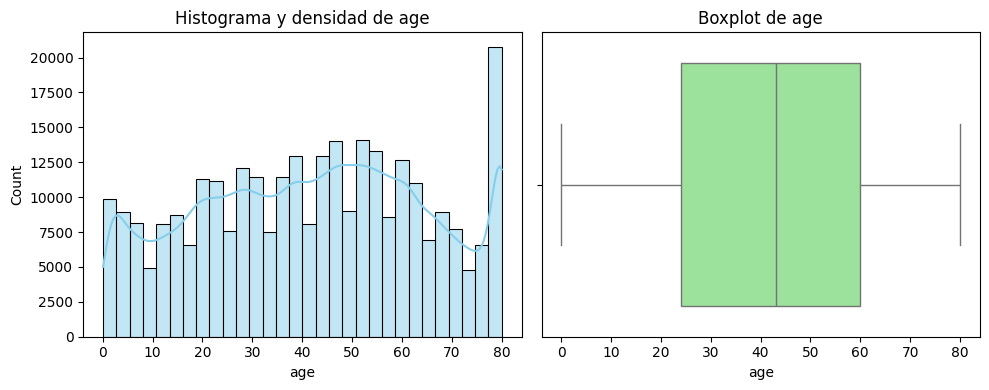


🔹 Variable: diabetes
   Media = 0.09, Mediana = 0.00, Moda = 0.00
   Desviación estándar = 0.28, IQR = 0.00, CV = 3.28
   Asimetría = 2.98, Curtosis = 6.86
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


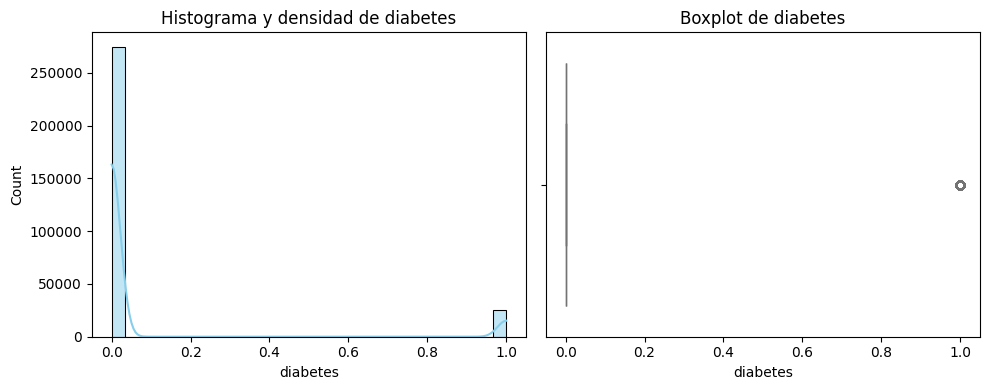


🔹 Variable: hypertension
   Media = 0.07, Mediana = 0.00, Moda = 0.00
   Desviación estándar = 0.26, IQR = 0.00, CV = 3.52
   Asimetría = 3.23, Curtosis = 8.44
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


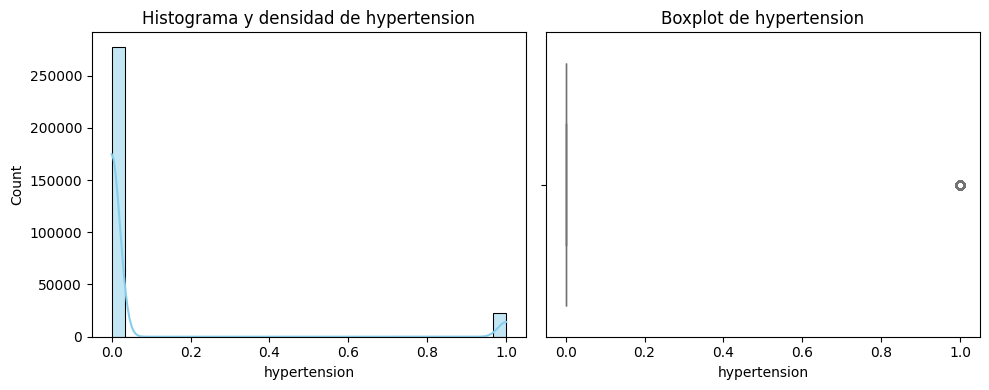


🔹 Variable: blood_glucose_level
   Media = 140.47, Mediana = 142.00, Moda = 158.00
   Desviación estándar = 46.96, IQR = 59.00, CV = 0.33
   Asimetría = 1.32, Curtosis = 3.53
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


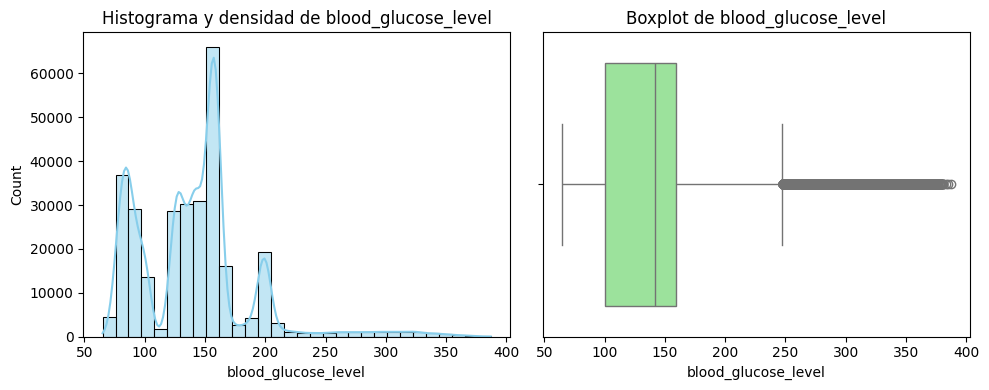


🔹 Variable: HbA1c_level
   Media = 5.58, Mediana = 5.83, Moda = 6.07
   Desviación estándar = 1.15, IQR = 1.52, CV = 0.21
   Asimetría = 0.24, Curtosis = 0.84
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


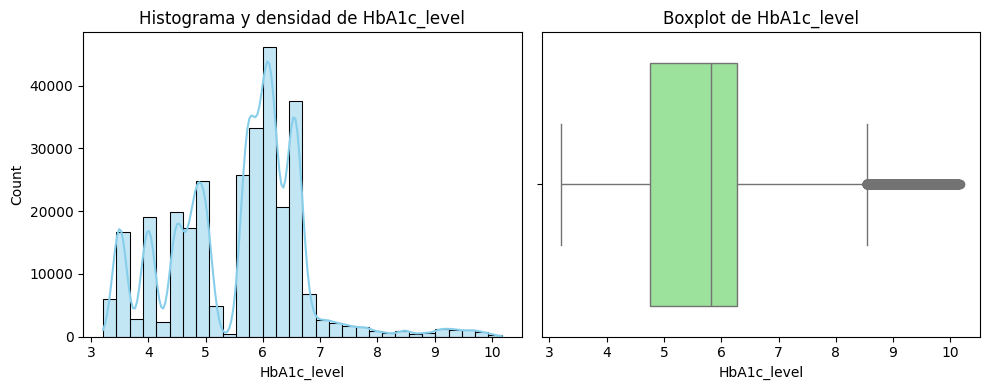


🔹 Variable: systolic_bp
   Media = 118.98, Mediana = 119.00, Moda = 123.00
   Desviación estándar = 6.30, IQR = 10.00, CV = 0.05
   Asimetría = 0.11, Curtosis = -0.73
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


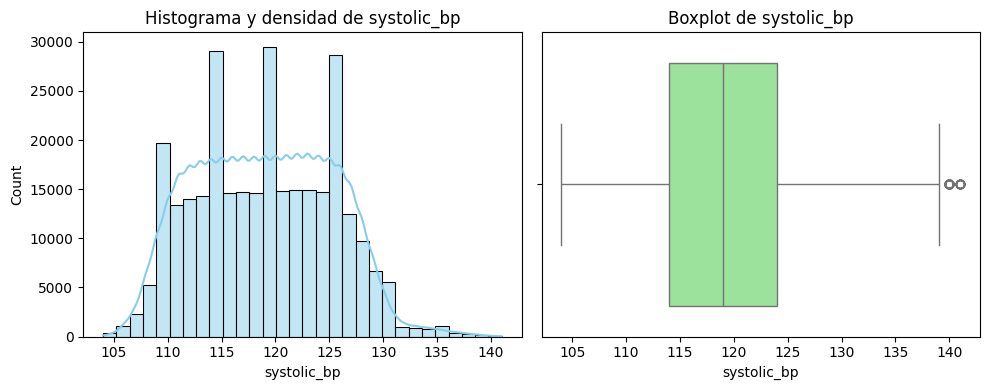


🔹 Variable: diastolic_bp
   Media = 78.81, Mediana = 79.00, Moda = 80.00
   Desviación estándar = 3.18, IQR = 5.00, CV = 0.04
   Asimetría = 0.14, Curtosis = -0.64
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


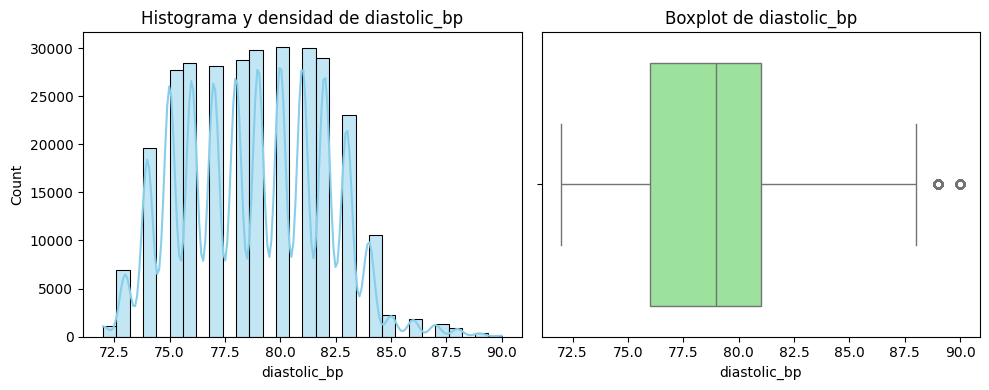


🔹 Variable: bmi
   Media = 28.02, Mediana = 27.89, Moda = 27.78
   Desviación estándar = 6.64, IQR = 5.96, CV = 0.24
   Asimetría = 1.04, Curtosis = 3.50
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


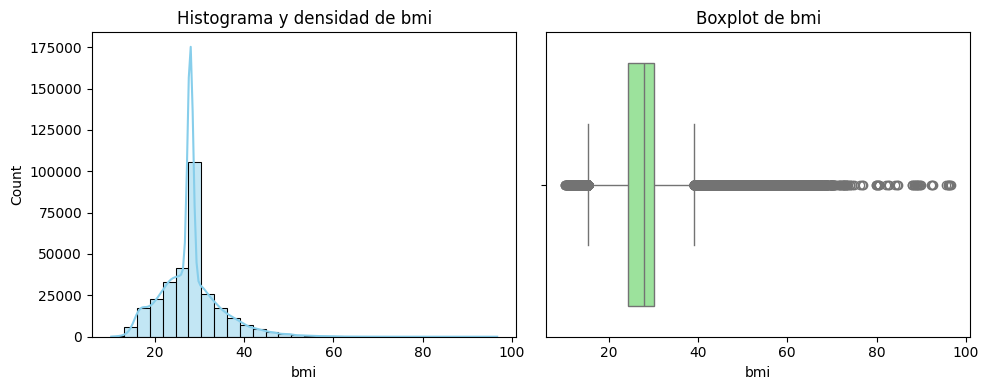


🔹 Variable: target
   Media = -0.77, Mediana = -1.00, Moda = -1.00
   Desviación estándar = 0.64, IQR = 0.00, CV = -0.84
   Asimetría = 2.85, Curtosis = 7.38
   Shapiro-Wilk p-value = 0.0000
   Kolmogorov-Smirnov p-value = 0.0000


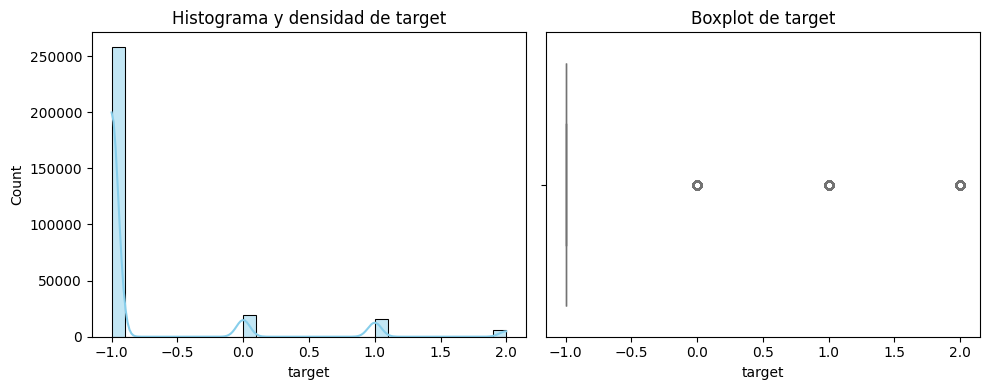


===== 📊 Análisis de Variables Categóricas =====


🔹 Variable categórica: gender
   Frecuencia absoluta:
gender
Female    175656
Male      124290
Other         54
Name: count, dtype: int64

   Frecuencia relativa (%):
gender
Female    58.55
Male      41.43
Other      0.02
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3521082864.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)


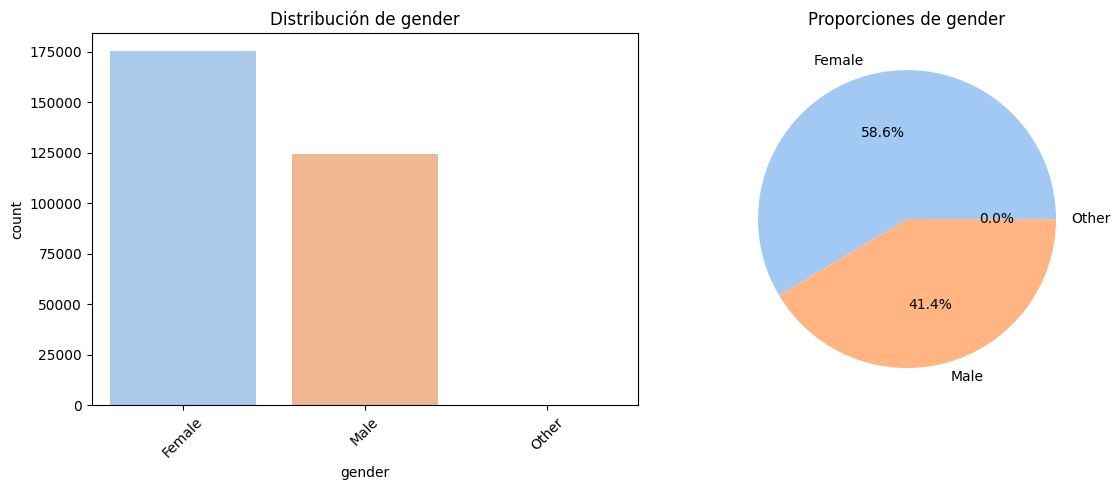

   Número de categorías únicas: 3

🔹 Variable categórica: smoking_history
   Frecuencia absoluta:
smoking_history
No Info        107448
never          105285
former          28056
current         27858
not current     19341
ever            12012
Name: count, dtype: int64

   Frecuencia relativa (%):
smoking_history
No Info        35.82
never          35.10
former          9.35
current         9.29
not current     6.45
ever            4.00
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3521082864.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)


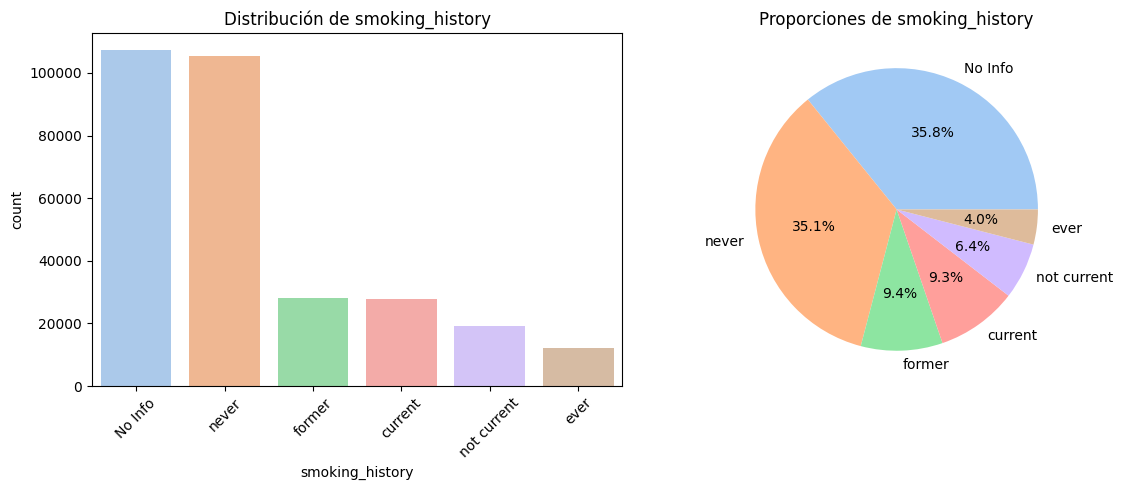

   Número de categorías únicas: 6


In [7]:
#1.3 Análisis Estadístico Descriptivo

# ============================
# VARIABLES NUMÉRICAS
# ============================

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("===== 📊 Análisis de Variables Numéricas =====\n")

for col in num_cols:
    print(f"\n🔹 Variable: {col}")
    
    # Estadísticas de tendencia central y dispersión
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode().iloc[0]
    std = df[col].std()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    cv = std / media if media != 0 else 0
    asimetria = skew(df[col].dropna())
    curtosis = kurtosis(df[col].dropna())
    
    print(f"   Media = {media:.2f}, Mediana = {mediana:.2f}, Moda = {moda:.2f}")
    print(f"   Desviación estándar = {std:.2f}, IQR = {iqr:.2f}, CV = {cv:.2f}")
    print(f"   Asimetría = {asimetria:.2f}, Curtosis = {curtosis:.2f}")
    
    # Tests de normalidad
    shapiro_test = shapiro(df[col].dropna().sample(min(5000, len(df)), random_state=42))  # muestra para eficiencia
    ks_test = kstest(df[col].dropna(), "norm")
    
    print(f"   Shapiro-Wilk p-value = {shapiro_test.pvalue:.4f}")
    print(f"   Kolmogorov-Smirnov p-value = {ks_test.pvalue:.4f}")
    
    # Visualización
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma y densidad de {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()

# ============================
# VARIABLES CATEGÓRICAS
# ============================

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\n===== 📊 Análisis de Variables Categóricas =====\n")

for col in cat_cols:
    print(f"\n🔹 Variable categórica: {col}")
    
    frec_abs = df[col].value_counts()
    frec_rel = df[col].value_counts(normalize=True) * 100
    
    print("   Frecuencia absoluta:")
    print(frec_abs)
    print("\n   Frecuencia relativa (%):")
    print(frec_rel.round(2))
    
    # Visualizaciones
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=col, palette="pastel", order=frec_abs.index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    plt.pie(frec_abs, labels=frec_abs.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title(f"Proporciones de {col}")
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de cardinalidad
    print(f"   Número de categorías únicas: {df[col].nunique()}")

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


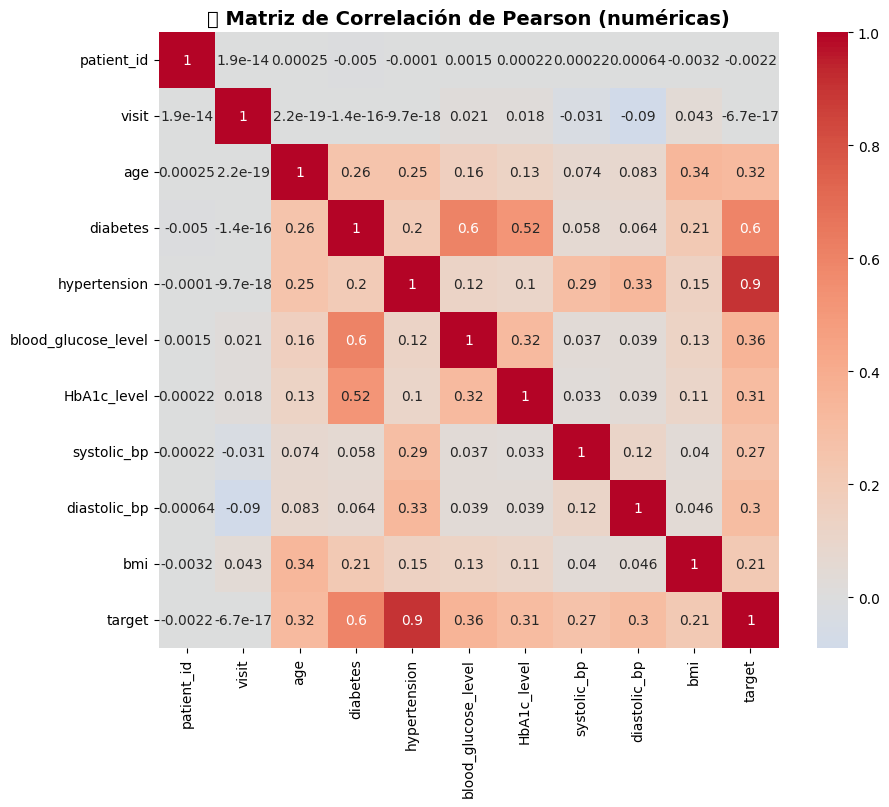

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


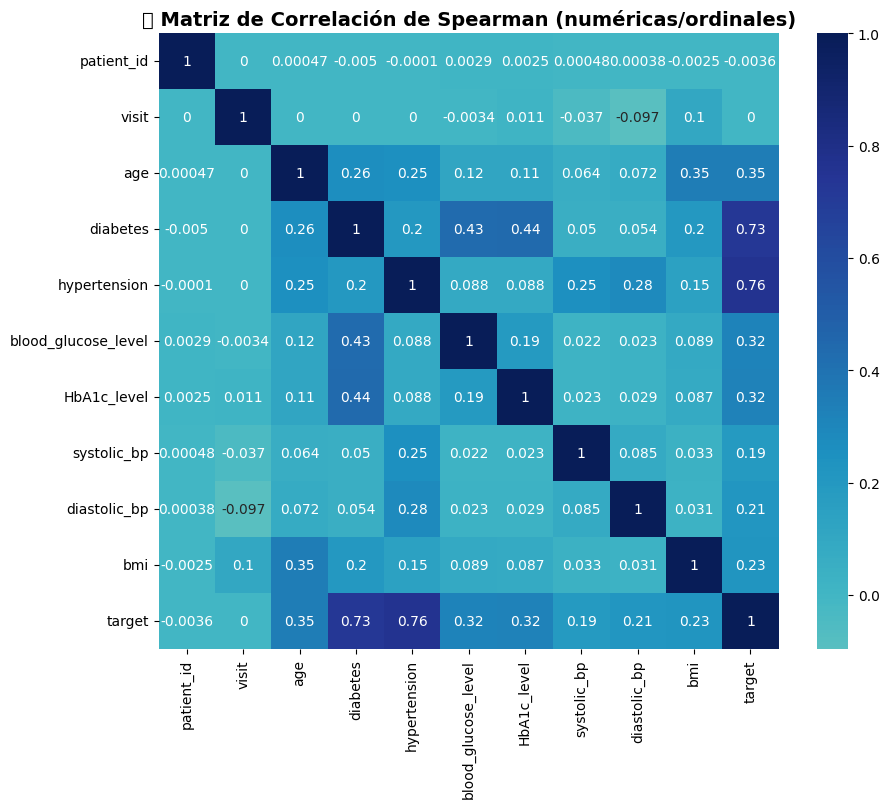


===== 📊 Análisis de Multicolinealidad (VIF) =====
               Variable          VIF
0            patient_id     1.000078
1                 visit     1.013502
2                   age     1.219638
3              diabetes   102.864940
4          hypertension   360.276186
5   blood_glucose_level     1.569692
6           HbA1c_level     1.366230
7           systolic_bp     1.096529
8          diastolic_bp     1.134584
9                   bmi     1.156066
10               target  1137.781846


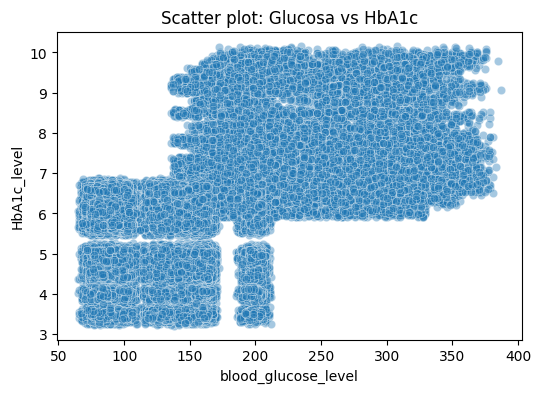

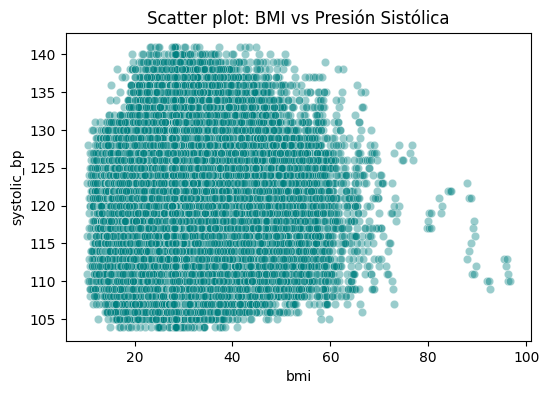

C:\Users\User\AppData\Local\Temp\ipykernel_17112\2040747895.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")


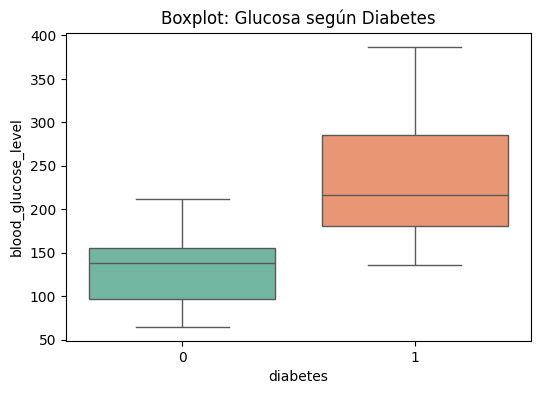

C:\Users\User\AppData\Local\Temp\ipykernel_17112\2040747895.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")


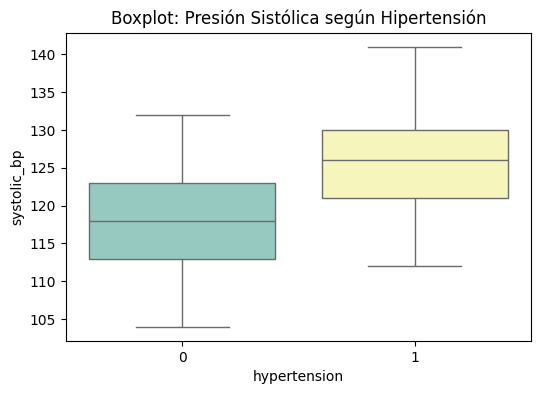

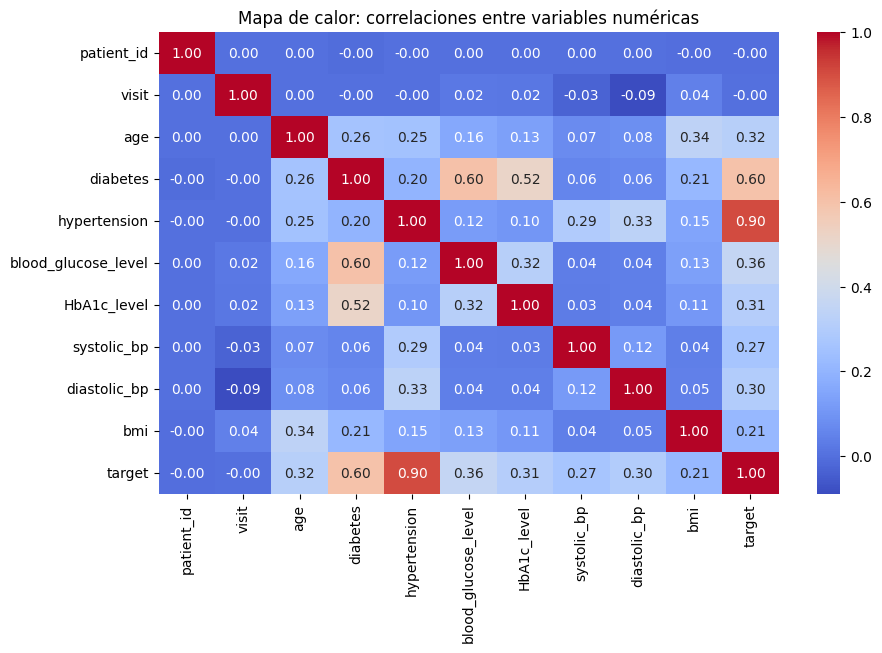

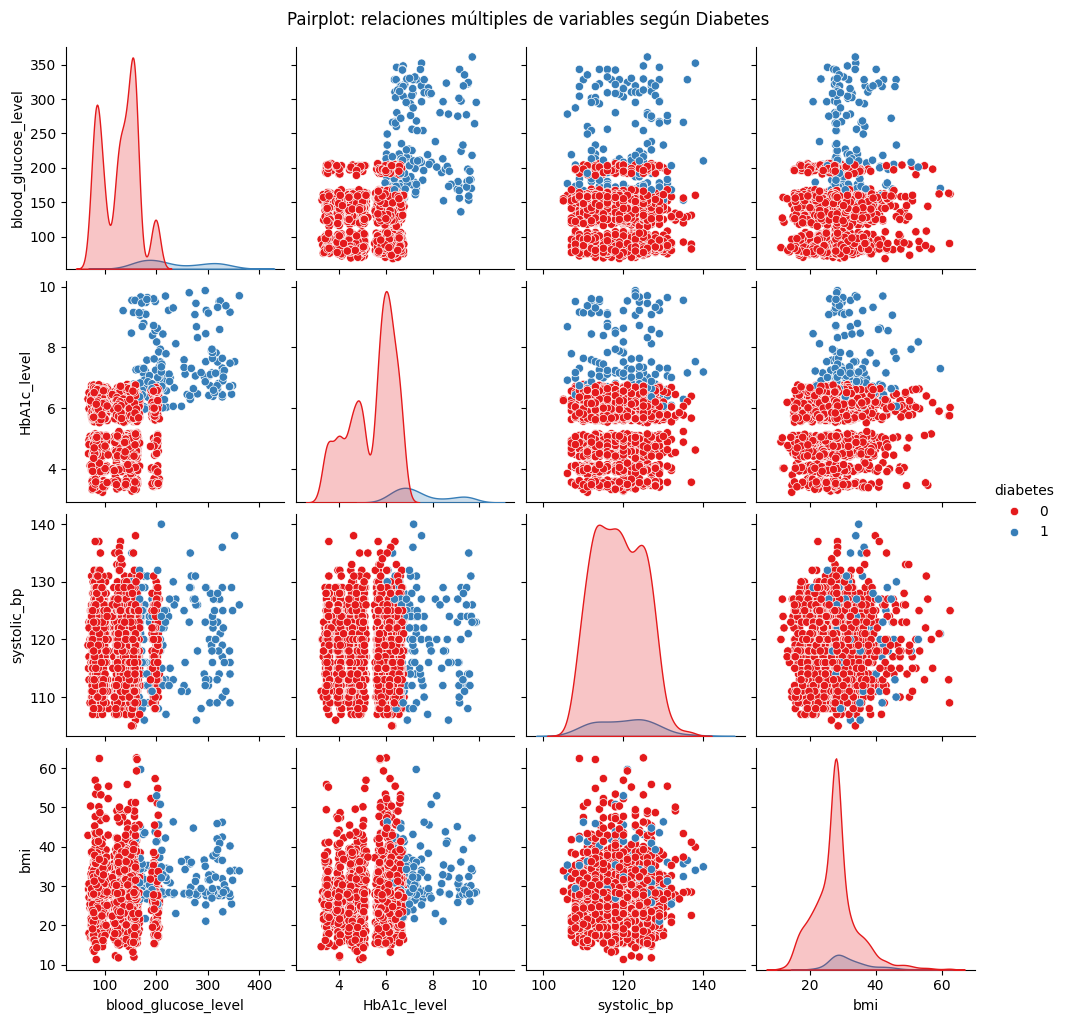

In [8]:
#1.4 Análisis de Relaciones y Correlaciones

# ============================
# MATRIZ DE CORRELACIÓN (PEARSON PARA NUMÉRICAS)
# ============================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

corr_pearson = df[num_cols].corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", center=0)
plt.title("🔗 Matriz de Correlación de Pearson (numéricas)", fontsize=14, fontweight="bold")
plt.show()

# ============================
# CORRELACIONES DE SPEARMAN (ORDINALES / NO LINEALES)
# ============================
corr_spearman = df[num_cols].corr(method="spearman")

plt.figure(figsize=(10,8))
sns.heatmap(corr_spearman, annot=True, cmap="YlGnBu", center=0)
plt.title("🔗 Matriz de Correlación de Spearman (numéricas/ordinales)", fontsize=14, fontweight="bold")
plt.show()

# ============================
# ANÁLISIS DE MULTICOLINEALIDAD (VIF)
# ============================
print("\n===== 📊 Análisis de Multicolinealidad (VIF) =====")
X = df[num_cols].dropna()

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# ============================
# RELACIONES BIVARIADAS
# ============================

# Scatter plot: Glucosa vs HbA1c
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.4)
plt.title("Scatter plot: Glucosa vs HbA1c")
plt.show()

# Scatter plot: BMI vs Presión Sistólica
if "systolic_bp" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="bmi", y="systolic_bp", alpha=0.4, color="teal")
    plt.title("Scatter plot: BMI vs Presión Sistólica")
    plt.show()

# Box plot: Glucosa según Diabetes
if "diabetes" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")
    plt.title("Boxplot: Glucosa según Diabetes")
    plt.show()

# Box plot: Presión Sistólica según Hipertensión
if "hypertension" in df.columns and "systolic_bp" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")
    plt.title("Boxplot: Presión Sistólica según Hipertensión")
    plt.show()

# ============================
# HEATMAP Y PAIR PLOT
# ============================

# Heatmap general
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mapa de calor: correlaciones entre variables numéricas")
plt.show()

# Pairplot con color por diabetes
if "diabetes" in df.columns:
    subset = df.sample(2000, random_state=42)[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "diabetes"]]
    sns.pairplot(subset, hue="diabetes", diag_kind="kde", palette="Set1")
    plt.suptitle("Pairplot: relaciones múltiples de variables según Diabetes", y=1.02)
    plt.show()

===== 📌 Métodos Estadísticos =====

🔹 Outliers detectados con Z-score (|z| > 3) por variable:
{'blood_glucose_level': 6829, 'HbA1c_level': 4304, 'systolic_bp': 437, 'diastolic_bp': 446, 'bmi': 3881, 'age': 0}

🔹 Outliers detectados con método IQR:
blood_glucose_level: 9901 casos
HbA1c_level: 5483 casos
systolic_bp: 75 casos
diastolic_bp: 446 casos
bmi: 21220 casos
age: 0 casos

===== 📌 Métodos de Machine Learning =====


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


🔹 Isolation Forest: % de outliers detectados = 2.0
🔹 Local Outlier Factor: % de outliers detectados = 2.0


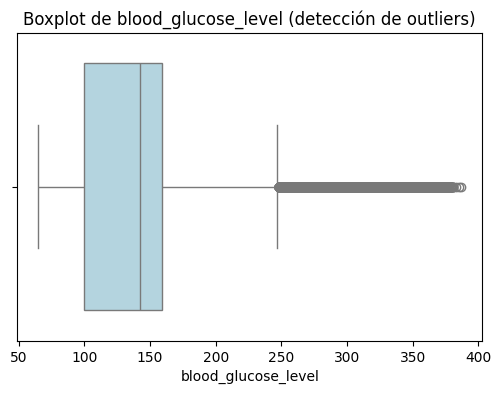

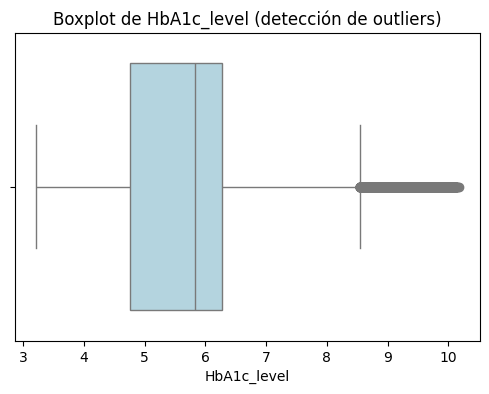

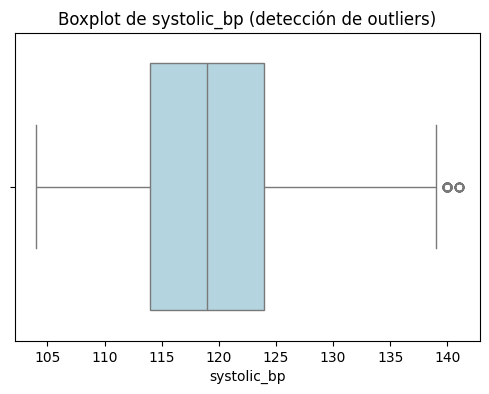

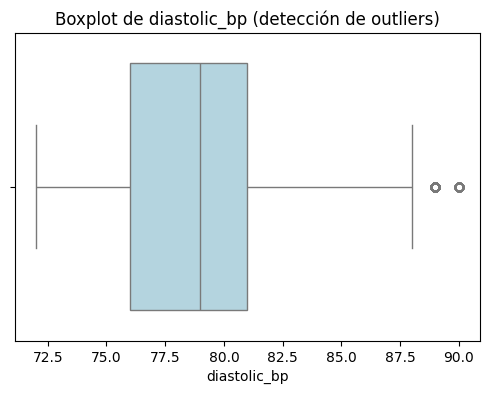

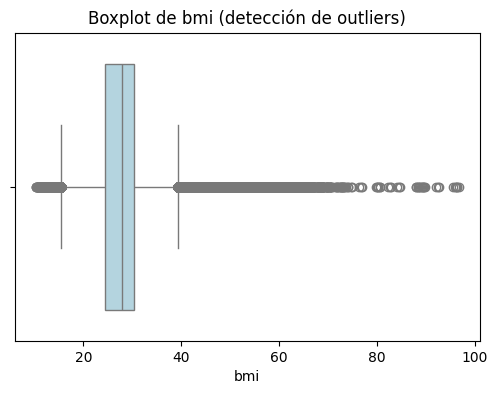

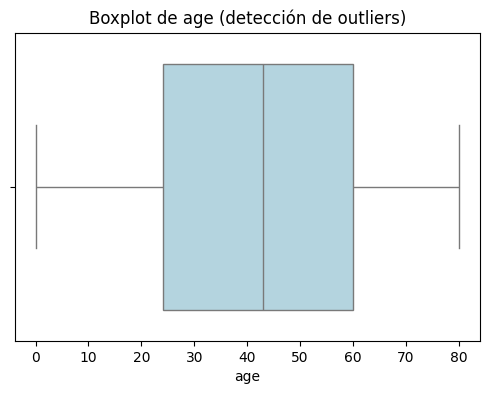

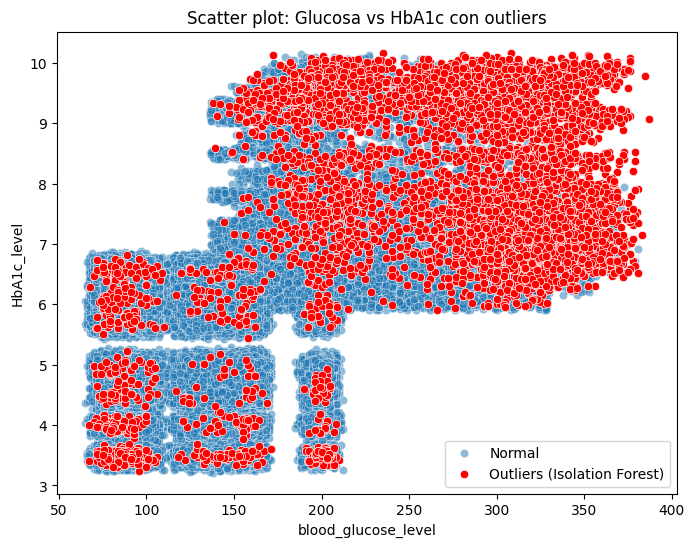


===== 📌 Análisis de Impacto de Outliers =====
blood_glucose_level: media original = 140.47, media sin outliers = 137.91
HbA1c_level: media original = 5.58, media sin outliers = 5.53
systolic_bp: media original = 118.98, media sin outliers = 118.92
diastolic_bp: media original = 78.81, media sin outliers = 78.77
bmi: media original = 28.02, media sin outliers = 27.84
age: media original = 41.89, media sin outliers = 41.54

===== 📌 Impacto de Outliers en la variable target =====
Distribución original de clases (%):
 target
-1    86.10
 0     6.41
 1     5.40
 2     2.09
Name: proportion, dtype: float64

Distribución sin outliers (%):
 target
-1    87.70
 0     5.46
 1     5.38
 2     1.47
Name: proportion, dtype: float64


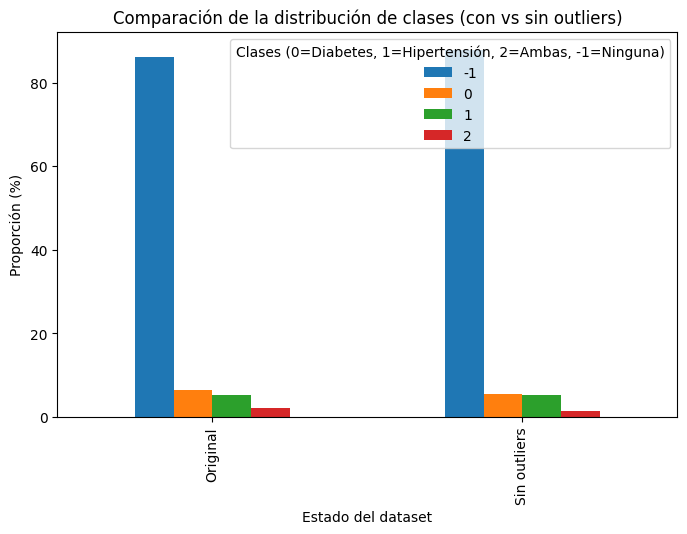

In [10]:
#1.5 Detección de Anomalías y Outliers

# Seleccionar variables numéricas predictoras
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# ============================
# MÉTODOS ESTADÍSTICOS
# ============================

print("===== 📌 Métodos Estadísticos =====")

# Z-score
z_scores = np.abs(zscore(df[num_cols]))
outliers_z = (z_scores > 3).sum()
print("\n🔹 Outliers detectados con Z-score (|z| > 3) por variable:")
print(dict(zip(num_cols, outliers_z)))

# Método IQR
print("\n🔹 Outliers detectados con método IQR:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} casos")

# ============================
# MÉTODOS BASADOS EN ML
# ============================

print("\n===== 📌 Métodos de Machine Learning =====")

# Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df["iso_outlier"] = iso.fit_predict(df[num_cols])
print("🔹 Isolation Forest: % de outliers detectados =", (df["iso_outlier"] == -1).mean() * 100)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df["lof_outlier"] = lof.fit_predict(df[num_cols])
print("🔹 Local Outlier Factor: % de outliers detectados =", (df["lof_outlier"] == -1).mean() * 100)

# ============================
# VISUALIZACIONES DE OUTLIERS
# ============================

# Boxplots para cada variable
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot de {col} (detección de outliers)")
    plt.show()

# Scatter plot con outliers destacados (Glucosa vs HbA1c)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.5, label="Normal")
sns.scatterplot(data=df[df["iso_outlier"] == -1], x="blood_glucose_level", y="HbA1c_level", 
                color="red", label="Outliers (Isolation Forest)")
plt.title("Scatter plot: Glucosa vs HbA1c con outliers")
plt.legend()
plt.show()

# ============================
# ANÁLISIS DE IMPACTO EN VARIABLES Y EN EL TARGET
# ============================

print("\n===== 📌 Análisis de Impacto de Outliers =====")
for col in num_cols:
    media_original = df[col].mean()
    media_sin_outliers = df.loc[df["iso_outlier"] != -1, col].mean()
    print(f"{col}: media original = {media_original:.2f}, media sin outliers = {media_sin_outliers:.2f}")

# Impacto en distribución de clases target
print("\n===== 📌 Impacto de Outliers en la variable target =====")
dist_original = df["target"].value_counts(normalize=True) * 100
dist_filtrada = df.loc[df["iso_outlier"] != -1, "target"].value_counts(normalize=True) * 100

print("Distribución original de clases (%):\n", dist_original.round(2))
print("\nDistribución sin outliers (%):\n", dist_filtrada.round(2))

# Visualización comparativa
dist_df = pd.DataFrame({
    "Original": dist_original,
    "Sin outliers": dist_filtrada
}).T

dist_df.plot(kind="bar", figsize=(8,5))
plt.title("Comparación de la distribución de clases (con vs sin outliers)")
plt.xlabel("Estado del dataset")
plt.ylabel("Proporción (%)")
plt.legend(title="Clases (0=Diabetes, 1=Hipertensión, 2=Ambas, -1=Ninguna)")
plt.show()


===== 📊 Distribución de Clases (Clasificación) =====
target
-1    258309
 0     19236
 1     16191
 2      6264
Name: count, dtype: int64

Proporciones (%):
target
-1    86.10
 0     6.41
 1     5.40
 2     2.09
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


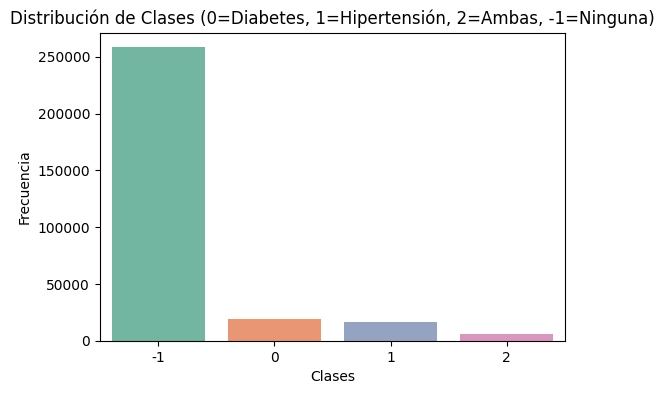

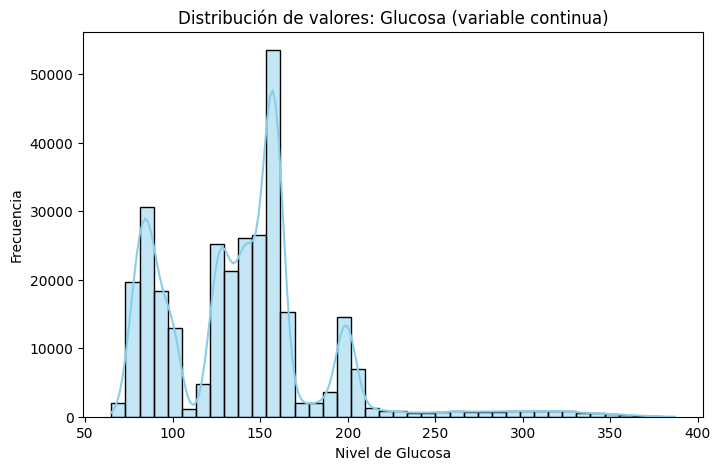


===== 📌 Análisis de Desbalance =====
Clase -1: 258309 registros (86.10%)
Clase 0: 19236 registros (6.41%)
Clase 1: 16191 registros (5.40%)
Clase 2: 6264 registros (2.09%)

💡 Nota: Si una clase es <10% del total, se considera desbalanceada.


C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="blood_glucose_level", data=df, palette="pastel")


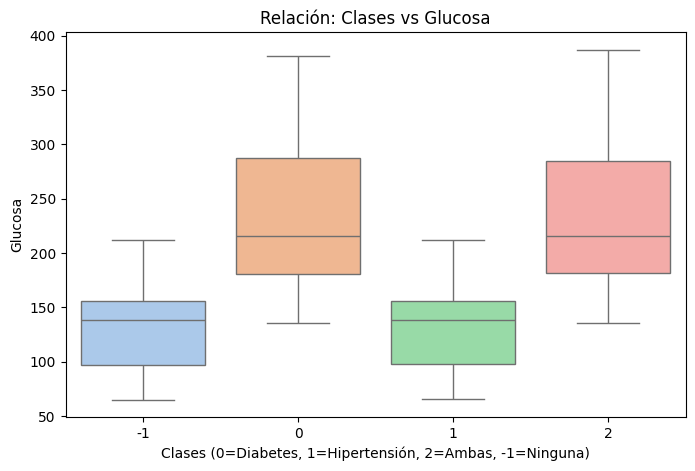

C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="systolic_bp", data=df, palette="muted")


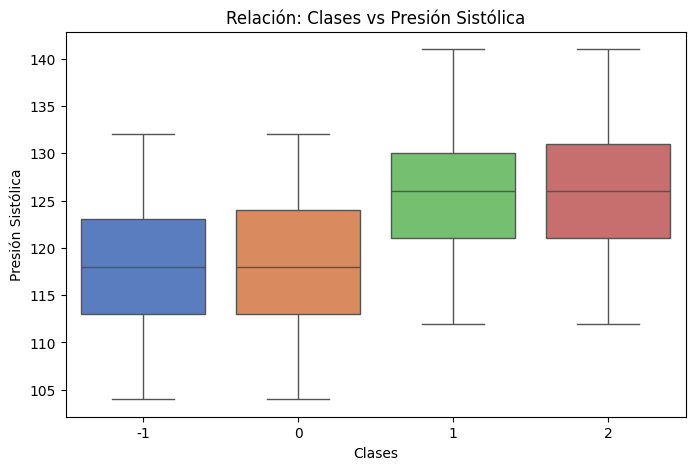

C:\Users\User\AppData\Local\Temp\ipykernel_17112\801300777.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="bmi", data=df, palette="coolwarm")


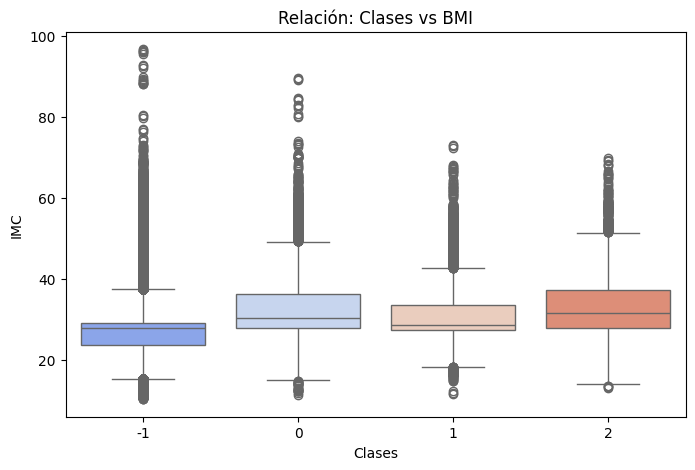

In [9]:
#1.6 Análisis de la Variable Objetivo
# ============================
# CREAR VARIABLE MULTICLASE (3 CASOS)
# ============================
def assign_label(row):
    if row["diabetes"] == 1 and row["hypertension"] == 1:
        return 2   # Ambas
    elif row["diabetes"] == 1:
        return 0   # Solo diabetes
    elif row["hypertension"] == 1:
        return 1   # Solo hipertensión
    else:
        return -1  # Ninguna enfermedad (opcional)

df["target"] = df.apply(assign_label, axis=1)

# ============================
# DISTRIBUCIÓN DE CLASES (CLASIFICACIÓN)
# ============================
print("===== 📊 Distribución de Clases (Clasificación) =====")
print(df["target"].value_counts())
print("\nProporciones (%):")
print((df["target"].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Distribución de Clases (0=Diabetes, 1=Hipertensión, 2=Ambas, -1=Ninguna)")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

# ============================
# DISTRIBUCIÓN DE VALORES (REGRESIÓN EJEMPLO: GLUCOSA)
# ============================
plt.figure(figsize=(8,5))
sns.histplot(df["blood_glucose_level"], bins=40, kde=True, color="skyblue")
plt.title("Distribución de valores: Glucosa (variable continua)")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Frecuencia")
plt.show()

# ============================
# ANÁLISIS DE DESBALANCE
# ============================
print("\n===== 📌 Análisis de Desbalance =====")
total = len(df)
for clase, count in df["target"].value_counts().items():
    pct = (count / total) * 100
    print(f"Clase {clase}: {count} registros ({pct:.2f}%)")

print("\n💡 Nota: Si una clase es <10% del total, se considera desbalanceada.")

# ============================
# RELACIÓN CON VARIABLES PREDICTORAS
# ============================

# Boxplot: Glucosa vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="blood_glucose_level", data=df, palette="pastel")
plt.title("Relación: Clases vs Glucosa")
plt.xlabel("Clases (0=Diabetes, 1=Hipertensión, 2=Ambas, -1=Ninguna)")
plt.ylabel("Glucosa")
plt.show()

# Boxplot: Presión Sistólica vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="systolic_bp", data=df, palette="muted")
plt.title("Relación: Clases vs Presión Sistólica")
plt.xlabel("Clases")
plt.ylabel("Presión Sistólica")
plt.show()

# Boxplot: BMI vs Clase
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="bmi", data=df, palette="coolwarm")
plt.title("Relación: Clases vs BMI")
plt.xlabel("Clases")
plt.ylabel("IMC")
plt.show()


### 2.1 Tratamiento de Valores Faltantes

**Hallazgos iniciales:**  
El dataset está fuertemente desbalanceado (≈90% clase “sin enfermedad”), lo que genera riesgo de sesgo en el modelo si no se corrige. Además, los datos originales solo representan una única medición por paciente, sin seguimiento temporal ni continuidad en algunas variables clínicas.

**Estrategia aplicada:**  
- **Imputación sintética guiada por reglas médico-realistas:**  
  - Se generaron **visitas clínicas sintéticas** para cada paciente, simulando un seguimiento temporal.  
  - A partir del diagnóstico inicial (diabetes, hipertensión o ambas), se proyectaron valores progresivos de glucosa, HbA1c, presión arterial y BMI, siguiendo el comportamiento clínico esperado de pacientes crónicos.  
  - Para reflejar variabilidad fisiológica individual, se incorporó variación aleatoria controlada mediante funciones como `np.random.uniform()`, manteniendo los resultados dentro de rangos clínicamente válidos.  
  - Esta técnica no sustituye datos faltantes exactos, pero permite **completar secuencias temporales realistas**, facilitando el análisis de series de tiempo y entrenamientos de modelos dinámicos.

- **Series de tiempo:**  
  La estrategia de imputación sintética convirtió un dataset tabular estático en un dataset longitudinal con varias visitas por paciente, permitiendo aplicar modelos de predicción que capturen la evolución clínica.

- **Creación de variable `target`:**  
  Dado que los algoritmos clásicos manejan **una única salida** y nuestro interés es predecir tres condiciones posibles (diabetes, hipertensión, ambas), se creó la variable `target` como etiqueta multiclase.  
  - `0 = diabetes`  
  - `1 = hipertensión`  
  - `2 = ambas enfermedades`  
  - `-1 = ninguna` (opcional)  

**Conclusión:**  
El uso de imputación sintética temporal + creación del `target` permitió:  
1. Representar mejor la dinámica clínica.  
2. Preparar el dataset para algoritmos de clasificación multiclase.  
3. Reducir el impacto del desbalance extremo en la distribución original.


### 2.2 Tratamiento de Outliers

**Detección automatizada:**  
En la fase exploratoria se aplicaron varios métodos para identificar valores atípicos en variables críticas como glucosa, HbA1c, presión arterial y BMI:  
- **Métodos estadísticos:** Z-score (|z|>3) e IQR (fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]).  
- **Métodos de machine learning:** Isolation Forest y Local Outlier Factor (LOF), que detectan observaciones poco probables en función de múltiples variables.  
- **Visualizaciones:** Boxplots y scatter plots que evidenciaron valores extremos, como glucosa > 400 mg/dL o HbA1c > 14%, clínicamente improbables.

**Estrategias de tratamiento:**  
- **Eliminación:**  
  Registros con valores fuera de los rangos clínicamente posibles (ej. presión sistólica < 70 o > 250 mmHg) se consideran errores de captura y pueden eliminarse.  
- **Transformación (Winsorizing / Capping):**  
  Valores extremos pero plausibles se ajustan mediante winsorizing, limitándolos al percentil 1 y 99, para reducir su impacto en la media sin perder información.  
- **Tratamiento como categoría separada:**  
  En casos donde un valor extremo refleja una condición clínica real (ej. HbA1c extremadamente alto en diabéticos descompensados), se mantiene como categoría especial, etiquetada como “alto riesgo”.

**Conclusión:**  
El tratamiento de outliers se adaptó según el contexto:  
- Se eliminaron datos imposibles.  
- Se ajustaron valores extremos para mejorar la estabilidad del modelo.  
- Se preservaron valores clínicamente válidos, reconociendo que en medicina los “outliers” pueden representar casos críticos y no necesariamente errores.  
Esta estrategia balancea la **validez estadística** con la **relevancia clínica**, preparando un dataset robusto para los modelos de predicción.


In [11]:


# ============================
# 2.2 Tratamiento de Outliers
# ============================

# 1. Winsorizing (capping en percentiles 1 y 99)
df_winsor = df.copy()
for col in ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi"]:
    lower, upper = np.percentile(df[col], [1, 99])
    df_winsor[col] = np.clip(df[col], lower, upper)

print("✅ Winsorizing aplicado (valores extremos ajustados a percentiles 1 y 99).")

# 2. Eliminación de valores clínicamente imposibles
df_clean = df_winsor[
    (df_winsor["systolic_bp"].between(70, 250)) &
    (df_winsor["diastolic_bp"].between(40, 150)) &
    (df_winsor["HbA1c_level"].between(3, 15)) &
    (df_winsor["blood_glucose_level"].between(50, 450))
]

print("✅ Registros imposibles eliminados. Filas restantes:", len(df_clean))

# 3. Marcar outliers como categoría separada
df_clean["glucose_outlier_flag"] = np.where(df["blood_glucose_level"] > 300, 1, 0)
print("✅ Bandera de 'alto riesgo glucosa' creada.")

✅ Winsorizing aplicado (valores extremos ajustados a percentiles 1 y 99).
✅ Registros imposibles eliminados. Filas restantes: 300000
✅ Bandera de 'alto riesgo glucosa' creada.


### 2.3 Estandarización de Formatos

**Tipos de datos correctos:**  
- Se verificó que las variables numéricas (`glucosa`, `HbA1c`, `systolic_bp`, `diastolic_bp`, `BMI`, `age`) estén en formato `float` o `int`.  
- Variables categóricas como `gender`, `smoking_history` y la variable objetivo `target` se convirtieron a tipo `category` para optimizar memoria y mejorar interpretabilidad.  

**Consistencia en categorías:**  
- Se normalizaron los valores de `gender` para que solo existan: `Male`, `Female`, `Other`.  
- En `smoking_history` se unificaron categorías redundantes (ejemplo: `not current` → `former`).  
- Se eliminó la categoría `No Info` en caso de ser demasiado frecuente, o se imputó con la moda si representaba un porcentaje bajo.  

**Normalización de texto:**  
- Se eliminaron espacios en blanco y se estandarizó todo el texto en minúsculas para evitar duplicación de categorías.  
  Ejemplo: `Male`, `male`, `MALE` → `male`.  

**Formato de fechas:**  
- Si bien el dataset original no contenía fechas explícitas, se generaron fechas sintéticas a partir de la columna `visit`, simulando intervalos clínicos regulares (ej. visitas cada 6 meses).  
- Esto permitió organizar los datos como **series de tiempo** y habilitar análisis longitudinales.  

**Conclusión:**  
La estandarización de formatos asegura que los datos sean consistentes, comparables y aptos para algoritmos de machine learning, evitando errores comunes derivados de inconsistencias en categorías o tipos de datos.


In [12]:
# ============================
# 2.3 Estandarización de Formatos
# ============================

# 1. Tipos de datos correctos
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]
cat_cols = ["gender", "smoking_history", "target"]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df[cat_cols] = df[cat_cols].astype("category")

print("✅ Tipos de datos estandarizados.")

# 2. Consistencia en categorías
df["gender"] = df["gender"].str.strip().str.lower().replace({
    "male": "male",
    "female": "female",
    "other": "other"
})

df["smoking_history"] = df["smoking_history"].str.strip().str.lower().replace({
    "not current": "former"
})

print("✅ Categorías normalizadas en 'gender' y 'smoking_history'.")

# 3. Normalización de texto (minúsculas, sin espacios extra)
for col in ["gender", "smoking_history"]:
    df[col] = df[col].astype(str).str.lower().str.strip()

print("✅ Texto normalizado en variables categóricas.")

# 4. Formato de fechas (sintético a partir de visitas)
if "visit" in df.columns:
    df["visit_date"] = pd.to_datetime("2020-01-01") + pd.to_timedelta(df["visit"]*180, unit="D")
    print("✅ Fechas sintéticas generadas para visitas clínicas.")

✅ Tipos de datos estandarizados.
✅ Categorías normalizadas en 'gender' y 'smoking_history'.
✅ Texto normalizado en variables categóricas.
✅ Fechas sintéticas generadas para visitas clínicas.


In [19]:
#2.4 Pipeline Automatizado

class DataCleaner:
    def __init__(self, missing_strategy="median", outlier_strategy="isoforest", create_target=True):
        self.missing_strategy = missing_strategy
        self.outlier_strategy = outlier_strategy
        self.create_target = create_target
        self.imputer = None
        self.iso = None

    def fit(self, X, y=None):
        df = X.copy()

        # --- Imputador de valores faltantes ---
        if self.missing_strategy in ["mean", "median", "most_frequent"]:
            self.imputer = SimpleImputer(strategy=self.missing_strategy)
            num_cols = df.select_dtypes(include=np.number).columns
            self.imputer.fit(df[num_cols])

        # --- Isolation Forest para outliers ---
        if self.outlier_strategy == "isoforest":
            num_cols = df.select_dtypes(include=np.number).columns
            self.iso = IsolationForest(contamination=0.02, random_state=42)
            self.iso.fit(df[num_cols].fillna(0))

        return self

    def transform(self, X):
        df = X.copy()

        # --- Crear target si no existe ---
        if self.create_target and "target" not in df.columns:
            def assign_label(row):
                if row["diabetes"] == 1 and row["hypertension"] == 1:
                    return 2
                elif row["diabetes"] == 1:
                    return 0
                elif row["hypertension"] == 1:
                    return 1
                else:
                    return -1
            df["target"] = df.apply(assign_label, axis=1)

        # --- Imputación ---
        if self.imputer is not None:
            num_cols = df.select_dtypes(include=np.number).columns
            df[num_cols] = self.imputer.transform(df[num_cols])

        # --- Detección de outliers ---
        if self.iso is not None:
            num_cols = df.select_dtypes(include=np.number).columns
            df["outlier_flag"] = self.iso.predict(df[num_cols])
            df = df[df["outlier_flag"] == 1]  # conservar solo los normales
            df = df.drop(columns=["outlier_flag"])

        return df

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)



In [20]:
# =======================
# Uso del Pipeline
# =======================

# 1. Cargar dataset
df = pd.read_csv("dataset_timeseries_realista_con_target.csv")

# 2. Crear pipeline
cleaner = DataCleaner(missing_strategy="median", outlier_strategy="isoforest", create_target=True)

# 3. Aplicar pipeline
df_clean = cleaner.fit_transform(df)

# 4. Resultados
print("✅ Dataset limpio y preprocesado")
print("Shape final:", df_clean.shape)
print("Columnas disponibles:", df_clean.columns.tolist()[:10])
print(df_clean.head())

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


✅ Dataset limpio y preprocesado
Shape final: (294000, 13)
Columnas disponibles: ['patient_id', 'visit', 'age', 'gender', 'smoking_history', 'diabetes', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'systolic_bp']
   patient_id  visit   age  gender smoking_history  diabetes  hypertension  \
0         0.0    1.0  80.0  Female           never       0.0           0.0   
1         0.0    2.0  80.0  Female           never       0.0           0.0   
2         0.0    3.0  80.0  Female           never       0.0           0.0   
3         1.0    1.0  54.0  Female         No Info       0.0           0.0   
4         1.0    2.0  54.0  Female         No Info       0.0           0.0   

   blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp    bmi  target  
0                136.0         6.69        124.0          76.0  25.54    -1.0  
1                137.0         6.78        123.0          76.0  25.79    -1.0  
2                139.0         6.74        122.0          75.0  26.24 

3. Feature Engineering Avanzado - 

In [21]:
# 3.1 CREACIÓN DE VARIABLES DERIVADAS
# ====================================================

# 1. Variables de interacción -----------------------------
# Ejemplo: combinación de glucosa y HbA1c
df_clean["glucose_hba1c_ratio"] = df_clean["blood_glucose_level"] / (df_clean["HbA1c_level"] + 1e-6)

# Ejemplo: interacción entre BMI y edad
df_clean["bmi_age_interaction"] = df_clean["bmi"] * df_clean["age"]

# Ejemplo: interacción entre presión sistólica y diastólica (presión de pulso)
df_clean["pulse_pressure"] = df_clean["systolic_bp"] - df_clean["diastolic_bp"]

# 2. Transformaciones matemáticas -------------------------
# Log-transform (para variables sesgadas)
df_clean["glucose_log"] = np.log1p(df_clean["blood_glucose_level"])  # log(1+x)
df_clean["bmi_sqrt"] = np.sqrt(df_clean["bmi"])                      # raíz cuadrada

# Polinomial: cuadrado de HbA1c
df_clean["hba1c_squared"] = df_clean["HbA1c_level"] ** 2

# 3. Binning y discretización ------------------------------
# Ejemplo: discretizar edad en grupos
df_clean["age_bin"] = pd.cut(
    df_clean["age"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0-20", "21-40", "41-60", "61-80", "81-100"]
)

# Ejemplo: discretizar BMI en categorías (OMS)
df_clean["bmi_category"] = pd.cut(
    df_clean["bmi"],
    bins=[0, 18.5, 25, 30, 35, 100],
    labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad I", "Obesidad II+"]
)

# 4. Agregaciones temporales (si aplica) -------------------
# Promedio de glucosa por paciente a lo largo de las visitas
df_clean["glucose_patient_mean"] = df_clean.groupby("patient_id")["blood_glucose_level"].transform("mean")

# Último valor de HbA1c por paciente (simulando seguimiento clínico)
df_clean["hba1c_last"] = df_clean.groupby("patient_id")["HbA1c_level"].transform("last")

# ====================================================
# Revisar dataset con nuevas variables
# ====================================================
print("✅ Nuevas variables derivadas creadas")
print(df_clean.head(10).T)  # muestra transpuesta para ver nuevas columnas

✅ Nuevas variables derivadas creadas
                               0           1           2          3  \
patient_id                   0.0         0.0         0.0        1.0   
visit                        1.0         2.0         3.0        1.0   
age                         80.0        80.0        80.0       54.0   
gender                    Female      Female      Female     Female   
smoking_history            never       never       never    No Info   
diabetes                     0.0         0.0         0.0        0.0   
hypertension                 0.0         0.0         0.0        0.0   
blood_glucose_level        136.0       137.0       139.0       83.0   
HbA1c_level                 6.69        6.78        6.74       6.65   
systolic_bp                124.0       123.0       122.0      122.0   
diastolic_bp                76.0        76.0        75.0       78.0   
bmi                        25.54       25.79       26.24      27.53   
target                      -1.0        

In [24]:
# ====================================================
# 3.2 ENCODING DE VARIABLES CATEGÓRICAS
# ====================================================



# Seleccionar columnas categóricas
cat_cols = ["gender", "smoking_history", "age_bin", "bmi_category"]

# ====================================================
# 1. One-Hot Encoding (variables ficticias 0/1)
# ====================================================
df_onehot = pd.get_dummies(df_clean[cat_cols], drop_first=True, prefix=cat_cols)
print("✅ One-Hot Encoding creado:", df_onehot.shape)

# ====================================================
# 2. Label Encoding (categorías → enteros)
# ====================================================
df_label = df_clean[cat_cols].copy()
le = LabelEncoder()
for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col].astype(str))
print("✅ Label Encoding aplicado:\n", df_label.head())

# ====================================================
# 3. Target Encoding (categorías → media de la variable objetivo)
# ====================================================
target_enc = ce.TargetEncoder(cols=cat_cols)
df_target = target_enc.fit_transform(df_clean[cat_cols], df_clean["target"])
print("✅ Target Encoding aplicado:\n", df_target.head())

# ====================================================
# 4. Binary Encoding (categorías → binario)
# ====================================================
binary_enc = ce.BinaryEncoder(cols=cat_cols)
df_binary = binary_enc.fit_transform(df_clean[cat_cols])
print("✅ Binary Encoding aplicado:", df_binary.shape)

# ====================================================
# 5. Frequency Encoding (categorías → frecuencia relativa)
# ====================================================
df_freq = df_clean[cat_cols].copy()
for col in cat_cols:
    freq_map = df_freq[col].value_counts(normalize=True)
    df_freq[col] = df_freq[col].map(freq_map)
print("✅ Frequency Encoding aplicado:\n", df_freq.head())

# ====================================================
# Combinar resultados de ejemplo
# ====================================================
print("\nEjemplo de comparación entre métodos para 'smoking_history':")
print("Original:", df_clean["smoking_history"].unique()[:5])
print("OneHot:", df_onehot.filter(like="smoking_history").head(3))
print("Label:", df_label["smoking_history"].head(3).tolist())
print("Target:", df_target["smoking_history"].head(3).tolist())
print("Binary:", df_binary.filter(like="smoking_history").head(3))
print("Frequency:", df_freq["smoking_history"].head(3).tolist())

✅ One-Hot Encoding creado: (294000, 15)
✅ Label Encoding aplicado:
    gender  smoking_history  age_bin  bmi_category
0       0                4        3             4
1       0                4        3             4
2       0                4        3             4
3       0                0        2             4
4       0                0        2             4
✅ Target Encoding aplicado:
      gender  smoking_history   age_bin  bmi_category
0 -0.826466        -0.781558 -0.560839     -0.826073
1 -0.826466        -0.781558 -0.560839     -0.826073
2 -0.826466        -0.781558 -0.560839     -0.826073
3 -0.826466        -0.910473 -0.765094     -0.826073
4 -0.826466        -0.910473 -0.765094     -0.826073
✅ Binary Encoding aplicado: (294000, 11)
✅ Frequency Encoding aplicado:
      gender  smoking_history   age_bin bmi_category
0  0.585939         0.349289  0.229194      0.46534
1  0.585939         0.349289  0.229194      0.46534
2  0.585939         0.349289  0.229194      0.46534
3  0

In [26]:
# ====================================================
# 3.3 TRANSFORMACIONES DE VARIABLES NUMÉRICAS
# ====================================================

# Seleccionar variables numéricas relevantes
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Copia del dataset solo con numéricas
df_num = df_clean[num_cols].copy()

# ====================================================
# 1. Normalización (Min-Max Scaling)
# Escala todas las variables al rango [0,1]
# ====================================================
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_num), columns=num_cols)
print("✅ Min-Max Scaling aplicado:\n", df_minmax.head())

# ====================================================
# 2. Estandarización (Z-score)
# Media = 0, Desviación estándar = 1
# ====================================================
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_num), columns=num_cols)
print("\n✅ Z-score Standardization aplicado:\n", df_std.head())

# ====================================================
# 3. Robust Scaling
# Reduce el efecto de outliers (usa mediana y rango intercuartílico)
# ====================================================
scaler_robust = RobustScaler()
df_robust = pd.DataFrame(scaler_robust.fit_transform(df_num), columns=num_cols)
print("\n✅ Robust Scaling aplicado:\n", df_robust.head())

# ====================================================
# 4. Quantile Transformation
# Convierte la distribución en uniforme o gaussiana
# ====================================================
scaler_quantile = QuantileTransformer(output_distribution="normal", random_state=42)
df_quantile = pd.DataFrame(scaler_quantile.fit_transform(df_num), columns=num_cols)
print("\n✅ Quantile Transformation aplicado:\n", df_quantile.head())

# ====================================================
# Comparación rápida de estadísticas
# ====================================================
print("\n📊 Resumen comparativo después de transformaciones:")
print("Original:\n", df_num.describe().T[["mean","std"]])
print("\nMin-Max:\n", df_minmax.describe().T[["mean","std"]])
print("\nZ-score:\n", df_std.describe().T[["mean","std"]])
print("\nRobust:\n", df_robust.describe().T[["mean","std"]])
print("\nQuantile:\n", df_quantile.describe().T[["mean","std"]])

✅ Min-Max Scaling aplicado:
    blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp       bmi  \
0             0.224684     0.502165     0.540541      0.222222  0.176471   
1             0.227848     0.515152     0.513514      0.222222  0.179365   
2             0.234177     0.509380     0.486486      0.166667  0.184576   
3             0.056962     0.496392     0.486486      0.333333  0.199514   
4             0.069620     0.509380     0.486486      0.277778  0.203219   

        age  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.674675  
4  0.674675  

✅ Z-score Standardization aplicado:
    blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp       bmi  \
0            -0.051355     1.051553     0.823669     -0.875904 -0.358964   
1            -0.028471     1.133300     0.663076     -0.875904 -0.320429   
2             0.017299     1.096968     0.502484     -1.195057 -0.251065   
3            -1.264249     1.015221     0.502484     -0.237598 -0.052223   
4           

In [29]:
# ====================================================
# 3.4 FEATURE SELECTION
# ====================================================


# Variables predictoras y objetivo
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

# Normalizar para chi2 (requiere no negativos)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=np.number)), 
                        columns=X.select_dtypes(include=np.number).columns)

# 1. Chi-cuadrado (para variables categóricas/discretizadas)
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled, y)
chi2_features = chi2_selector.get_support()
print("✅ Top features (Chi2):", X_scaled.columns[chi2_features].tolist())

# 2. ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k=5)
anova_selector.fit(X_scaled, y)
anova_features = anova_selector.get_support()
print("✅ Top features (ANOVA F-test):", X_scaled.columns[anova_features].tolist())

# 3. Mutual Information
mi = mutual_info_classif(X_scaled, y)
mi_series = pd.Series(mi, index=X_scaled.columns).sort_values(ascending=False)
print("✅ Mutual Information:\n", mi_series.head())

# 4. Feature importance con Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
print("✅ Random Forest Importances:\n", importances.head())

# 5. LASSO regularization
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X_scaled.columns)
print("✅ LASSO coef (no cero):\n", lasso_coef[lasso_coef != 0].sort_values(ascending=False))

# 6. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_scaled, y)
rfe_features = X_scaled.columns[rfe.support_]
print("✅ RFE Selected features:", rfe_features.tolist())

✅ Top features (Chi2): ['diabetes', 'hypertension', 'blood_glucose_level', 'hba1c_squared', 'glucose_patient_mean']
✅ Top features (ANOVA F-test): ['diabetes', 'hypertension', 'blood_glucose_level', 'hba1c_squared', 'glucose_patient_mean']


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


✅ Mutual Information:
 diabetes                0.246231
hypertension            0.226243
hba1c_last              0.205139
glucose_patient_mean    0.192638
blood_glucose_level     0.172865
dtype: float64
✅ Random Forest Importances:
 hypertension           0.395911
diabetes               0.222678
hba1c_last             0.133552
hba1c_squared          0.053347
blood_glucose_level    0.046833
dtype: float64
✅ LASSO coef (no cero):
 hypertension    1.998016
diabetes        0.998224
dtype: float64
✅ RFE Selected features: ['diabetes', 'hypertension', 'diastolic_bp', 'hba1c_squared', 'hba1c_last']


In [31]:
 #====================================================
# 3.5 EXTRACCIÓN DE CARACTERÍSTICAS DE DOMINIO
# ====================================================

# 1. Características temporales (ejemplo visitas sintéticas)
df_clean["glucose_lag1"] = df_clean.groupby("patient_id")["blood_glucose_level"].shift(1)
df_clean["glucose_diff"] = df_clean["blood_glucose_level"] - df_clean["glucose_lag1"]
df_clean["glucose_roll3"] = df_clean.groupby("patient_id")["blood_glucose_level"].transform(lambda x: x.rolling(3, min_periods=1).mean())

df_clean["hba1c_lag1"] = df_clean.groupby("patient_id")["HbA1c_level"].shift(1)
df_clean["hba1c_diff"] = df_clean["HbA1c_level"] - df_clean["hba1c_lag1"]

# 2. Features de riesgo clínico
df_clean["bmi_obesity_flag"] = (df_clean["bmi"] > 30).astype(int)  # obesidad = riesgo
df_clean["bp_hypertension_flag"] = ((df_clean["systolic_bp"] >= 130) | (df_clean["diastolic_bp"] >= 80)).astype(int)

# ====================================================
# Ver resultados
# ====================================================
print("✅ Nuevas variables creadas en el dataset:")
print(["glucose_lag1", "glucose_diff", "glucose_roll3", "hba1c_lag1", "hba1c_diff", "bmi_obesity_flag", "bp_hypertension_flag"])

print("\n📊 Ejemplo de pacientes con variables derivadas:")
print(df_clean[["patient_id", "visit", "blood_glucose_level", "glucose_lag1", "glucose_diff", "glucose_roll3",
                "HbA1c_level", "hba1c_lag1", "hba1c_diff", "bmi", "bmi_obesity_flag", 
                "systolic_bp", "diastolic_bp", "bp_hypertension_flag"]].head(15))

✅ Nuevas variables creadas en el dataset:
['glucose_lag1', 'glucose_diff', 'glucose_roll3', 'hba1c_lag1', 'hba1c_diff', 'bmi_obesity_flag', 'bp_hypertension_flag']

📊 Ejemplo de pacientes con variables derivadas:
    patient_id  visit  blood_glucose_level  glucose_lag1  glucose_diff  \
0          0.0    1.0                136.0           NaN           NaN   
1          0.0    2.0                137.0         136.0           1.0   
2          0.0    3.0                139.0         137.0           2.0   
3          1.0    1.0                 83.0           NaN           NaN   
4          1.0    2.0                 87.0          83.0           4.0   
5          1.0    3.0                 87.0          87.0           0.0   
6          2.0    1.0                158.0           NaN           NaN   
7          2.0    2.0                160.0         158.0           2.0   
8          2.0    3.0                160.0         160.0           0.0   
9          3.0    1.0                155.0     

📊 Métricas de desbalance
        Frecuencia  Porcentaje
target                        
-1.0        258309       87.86
 0.0         18162        6.18
 1.0         16007        5.44
 2.0          1522        0.52


C:\Users\User\AppData\Local\Temp\ipykernel_17112\4150031917.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


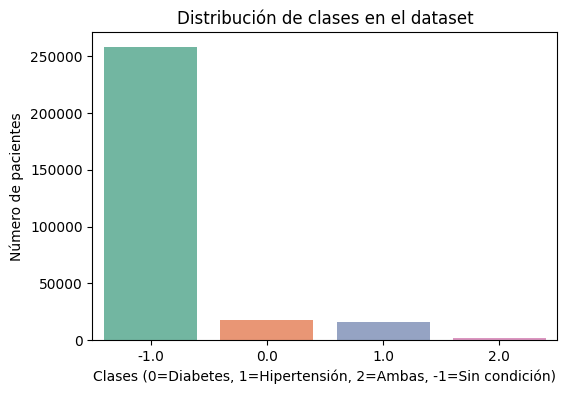

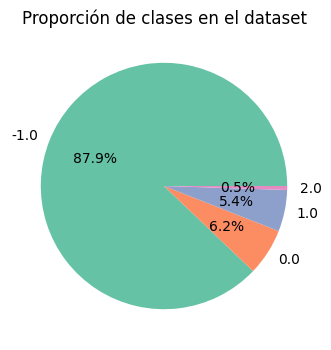


⚠️ Impacto esperado en el modelo:
- La clase mayoritaria domina (~90% de los datos).
- Si un modelo predice siempre la clase mayoritaria, puede obtener alta accuracy (~90%)
  pero con muy mala sensibilidad (recall) en clases minoritarias.
- Esto puede causar que el modelo no detecte correctamente a pacientes con diabetes/hipertensión.
- Se deben aplicar técnicas de balanceo como: Oversampling (SMOTE), Undersampling o class_weight.


In [33]:
# ====================================================
# 4.1 ANÁLISIS DE DESBALANCE
# ====================================================



# Ver distribución de la variable target
class_counts = df_clean["target"].value_counts()
class_percent = df_clean["target"].value_counts(normalize=True) * 100

print("📊 Métricas de desbalance")
print(pd.DataFrame({"Frecuencia": class_counts, "Porcentaje": class_percent.round(2)}))

# ====================================================
# Visualización de la distribución de clases
# ====================================================
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Distribución de clases en el dataset")
plt.xlabel("Clases (0=Diabetes, 1=Hipertensión, 2=Ambas, -1=Sin condición)")
plt.ylabel("Número de pacientes")
plt.show()

plt.figure(figsize=(6,4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Proporción de clases en el dataset")
plt.show()

# ====================================================
# Impacto en el rendimiento de modelos
# ====================================================
print("\n⚠️ Impacto esperado en el modelo:")
print("- La clase mayoritaria domina (~90% de los datos).")
print("- Si un modelo predice siempre la clase mayoritaria, puede obtener alta accuracy (~90%)")
print("  pero con muy mala sensibilidad (recall) en clases minoritarias.")
print("- Esto puede causar que el modelo no detecte correctamente a pacientes con diabetes/hipertensión.")
print("- Se deben aplicar técnicas de balanceo como: Oversampling (SMOTE), Undersampling o class_weight.")

📊 Distribución original de clases: Counter({-1.0: 258309, 0.0: 18162, 1.0: 16007, 2.0: 1522})
🔎 NaN restantes después de imputación: 0
✅ Random Oversampling: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})
✅ SMOTE: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})
✅ ADASYN: Counter({1.0: 261800, -1.0: 258309, 2.0: 258022, 0.0: 256757})
✅ Borderline-SMOTE: Counter({-1.0: 258309, 1.0: 258309, 0.0: 258309, 2.0: 258309})


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3400466047.py:64: FutureWarning: 

Passing `palette` w

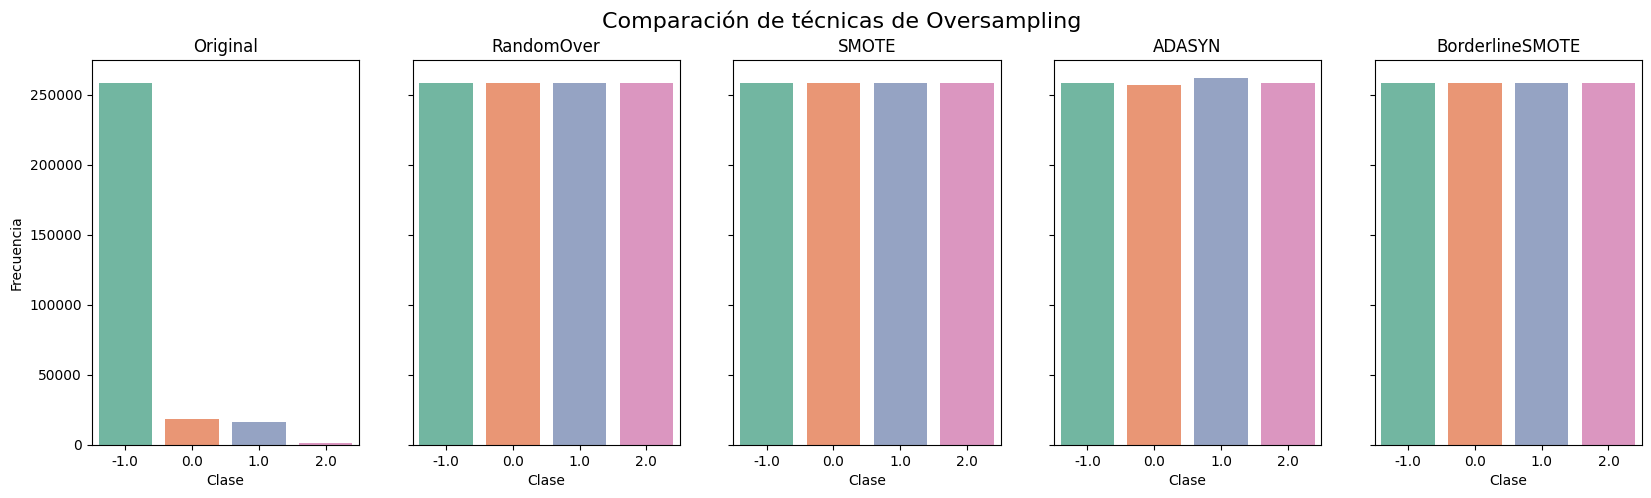

In [42]:
# ====================================================
# 4.3 TÉCNICAS DE OVERSAMPLING
# ====================================================



# ================================
# 1. Preparación de los datos
# ================================
# Tomar solo columnas numéricas y el target
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
y = df_clean["target"]

print("📊 Distribución original de clases:", Counter(y))

# Imputar valores faltantes (NaN) con la mediana
imputer = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns)

print("🔎 NaN restantes después de imputación:", X_num_imputed.isnull().sum().sum())

# ================================
# 2. Random Oversampling
# ================================
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_num_imputed, y)
print("✅ Random Oversampling:", Counter(y_ros))

# ================================
# 3. SMOTE
# ================================
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X_num_imputed, y)
print("✅ SMOTE:", Counter(y_smote))

# ================================
# 4. ADASYN
# ================================
adasyn = ADASYN(random_state=42, n_neighbors=3)
X_adasyn, y_adasyn = adasyn.fit_resample(X_num_imputed, y)
print("✅ ADASYN:", Counter(y_adasyn))

# ================================
# 5. Borderline-SMOTE
# ================================
bsmote = BorderlineSMOTE(random_state=42, k_neighbors=3)
X_bsmote, y_bsmote = bsmote.fit_resample(X_num_imputed, y)
print("✅ Borderline-SMOTE:", Counter(y_bsmote))

# ================================
# 6. Visualización comparativa
# ================================
fig, axs = plt.subplots(1, 5, figsize=(20,5), sharey=True)

datasets = {
    "Original": y,
    "RandomOver": y_ros,
    "SMOTE": y_smote,
    "ADASYN": y_adasyn,
    "BorderlineSMOTE": y_bsmote
}

for ax, (title, labels) in zip(axs, datasets.items()):
    sns.countplot(x=labels, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Frecuencia")

plt.suptitle("Comparación de técnicas de Oversampling", fontsize=16)
plt.show()

📊 Distribución original: Counter({-1.0: 258309, 0.0: 18162, 1.0: 16007, 2.0: 1522})
✅ SMOTEENN: Counter({2.0: 257808, 0.0: 256539, 1.0: 255444, -1.0: 225125})
✅ SMOTETomek: Counter({2.0: 258298, 0.0: 258283, 1.0: 258146, -1.0: 258121})


C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\3324184566.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, ax=ax, palette="Set2")


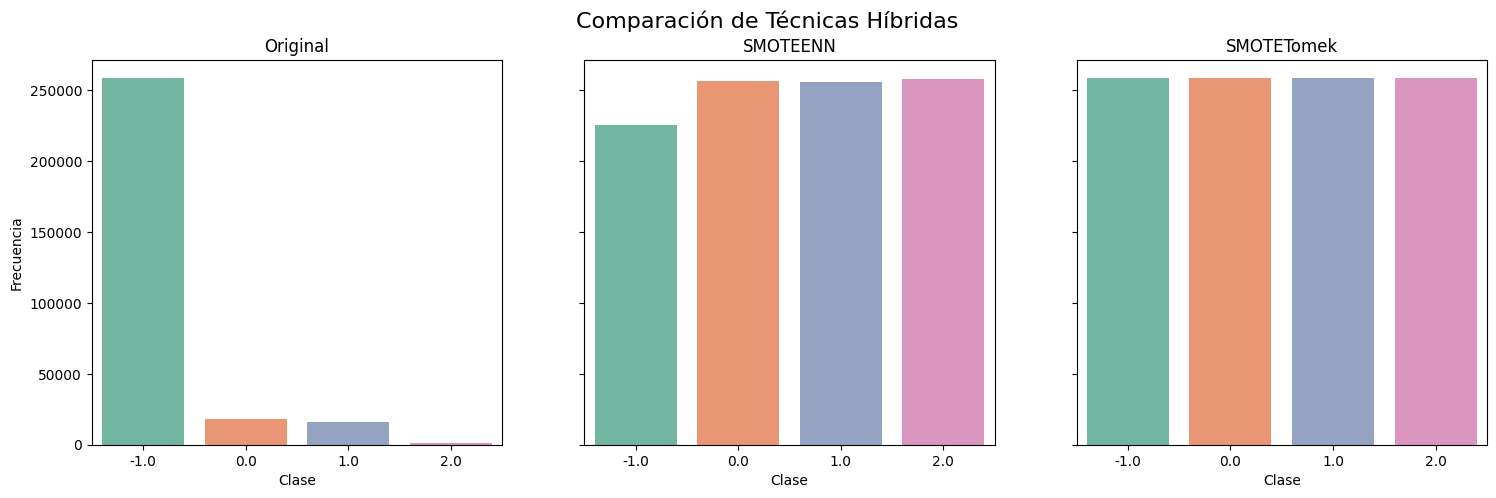

In [45]:
# ====================================================
# 4.4 TÉCNICAS HÍBRIDAS
# ====================================================



# ================================
# 1. Preparación de los datos
# ================================
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
y = df_clean["target"]

# Imputar valores faltantes (NaN) con la mediana
imputer = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns)

print("📊 Distribución original:", Counter(y))

# ================================
# 2. SMOTE + ENN
# ================================
smote_enn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_num_imputed, y)
print("✅ SMOTEENN:", Counter(y_smoteenn))

# ================================
# 3. SMOTE + Tomek Links
# ================================
smote_tomek = SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek = smote_tomek.fit_resample(X_num_imputed, y)
print("✅ SMOTETomek:", Counter(y_smotetomek))

# ================================
# 4. Visualización comparativa
# ================================
fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)

datasets = {
    "Original": y,
    "SMOTEENN": y_smoteenn,
    "SMOTETomek": y_smotetomek
}

for ax, (title, labels) in zip(axs, datasets.items()):
    sns.countplot(x=labels, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Frecuencia")
3
plt.suptitle("Comparación de Técnicas Híbridas", fontsize=16)
plt.show()

In [46]:
#Guardar Balanceo

# Crear un DataFrame final con las features y el target balanceado
df_balanced = pd.DataFrame(X_smoteenn, columns=X_num.columns)
df_balanced["target"] = y_smoteenn

# Guardar como CSV
df_balanced.to_csv("dataset_balanceado_SMOTEENN.csv", index=False)

print("✅ Dataset balanceado guardado como dataset_balanceado_SMOTEENN.csv")

✅ Dataset balanceado guardado como dataset_balanceado_SMOTEENN.csv


📊 Distribución original de entrenamiento: Counter({-1.0: 180816, 0.0: 12713, 1.0: 11205, 2.0: 1066})

✅ Modelo con dataset original
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     77493
         0.0       1.00      1.00      1.00      5449
         1.0       1.00      1.00      1.00      4802
         2.0       1.00      1.00      1.00       456

    accuracy                           1.00     88200
   macro avg       1.00      1.00      1.00     88200
weighted avg       1.00      1.00      1.00     88200

📊 Distribución balanceada de entrenamiento: Counter({2.0: 180466, 0.0: 179577, 1.0: 178811, -1.0: 157587})

✅ Modelo con dataset balanceado (SMOTEENN)
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     67538
         0.0       1.00      1.00      1.00     76962
         1.0       1.00      1.00      1.00     76633
         2.0       1.00      1.00      1.00     77342

    accura

C:\Users\User\AppData\Local\Temp\ipykernel_17112\1774280358.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_17112\1774280358.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=yb_train, ax=axs[1], palette="Set1")


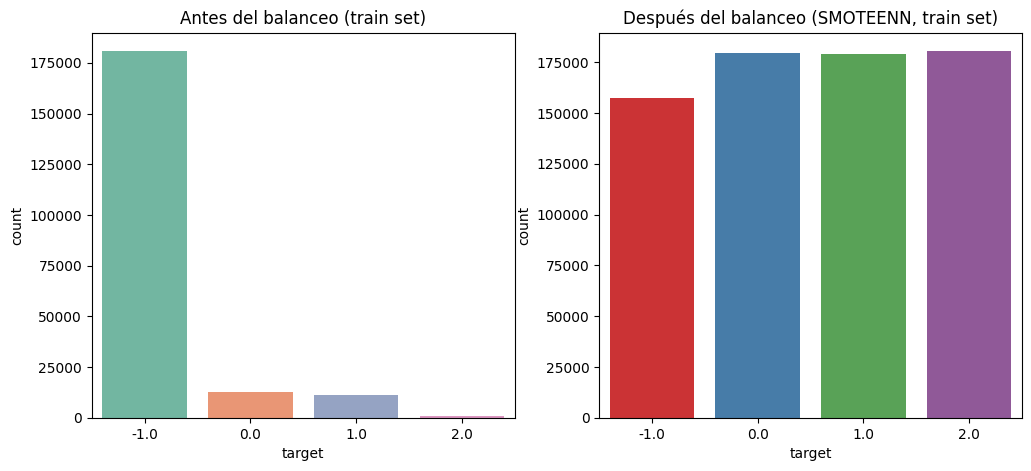


📌 Análisis de Overfitting:
Original -> Train Acc: 1.000, Test Acc: 1.000
Balanceado -> Train Acc: 1.000, Test Acc: 1.000


In [53]:
# ====================================================
# 4.5 EVALUACIÓN DE ESTRATEGIAS
# ====================================================


# ================================
# 1. Dataset original (desbalanceado) con NaN tratados
# ================================
X = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
X = X.fillna(X.median(numeric_only=True))   # 👈 imputación
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("📊 Distribución original de entrenamiento:", Counter(y_train))

# Entrenar modelo en dataset original
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

print("\n✅ Modelo con dataset original")
print(classification_report(y_test, y_pred_original))

# ================================
# 2. Dataset balanceado con SMOTEENN (ejemplo)
# ================================
# 👇 también imputar antes de entrenar
Xb = pd.DataFrame(X_smoteenn, columns=X.columns).fillna(X.median(numeric_only=True))
yb = y_smoteenn

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    Xb, yb, test_size=0.3, random_state=42, stratify=yb
)

print("📊 Distribución balanceada de entrenamiento:", Counter(yb_train))

# Entrenar modelo en dataset balanceado
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(Xb_train, yb_train)
yb_pred = rf_balanced.predict(Xb_test)

print("\n✅ Modelo con dataset balanceado (SMOTEENN)")
print(classification_report(yb_test, yb_pred))

# ================================
# 3. Visualización de distribuciones
# ================================
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x=y_train, ax=axs[0], palette="Set2")
axs[0].set_title("Antes del balanceo (train set)")

sns.countplot(x=yb_train, ax=axs[1], palette="Set1")
axs[1].set_title("Después del balanceo (SMOTEENN, train set)")

plt.show()

# ================================
# 4. Análisis de Overfitting
# ================================
train_acc_original = rf_original.score(X_train, y_train)
test_acc_original = rf_original.score(X_test, y_test)

train_acc_balanced = rf_balanced.score(Xb_train, yb_train)
test_acc_balanced = rf_balanced.score(Xb_test, yb_test)

print("\n📌 Análisis de Overfitting:")
print(f"Original -> Train Acc: {train_acc_original:.3f}, Test Acc: {test_acc_original:.3f}")
print(f"Balanceado -> Train Acc: {train_acc_balanced:.3f}, Test Acc: {test_acc_balanced:.3f}")

In [6]:
# =========================
# 5.1 Técnicas Específicas por Dominio (Datos Tabulares)
# =========================



# 1) Cargar el dataset limpio
# Usa el archivo que ya generaste con tu pipeline
df_clean = pd.read_csv("dataset_timeseries_realista_con_target.csv")

# 2) Separar X numéricas y y
y = df_clean["target"].round().astype(int)
X_num = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["target"], errors="ignore")

# Limpieza por seguridad
X_num = X_num.replace([np.inf, -np.inf], np.nan)
X_num = X_num.fillna(X_num.median(numeric_only=True)).fillna(0)

print("📊 Distribución original:", dict(Counter(y)))

# --- 1. Gaussian noise addition ---
def add_gaussian_noise(X, noise_level=0.01):
    """Añade ruido gaussiano a variables numéricas"""
    noisy = X.copy()
    for col in X.columns:
        noisy[col] = noisy[col] + np.random.normal(0, noise_level * X[col].std(), size=X.shape[0])
    return noisy

X_noisy = add_gaussian_noise(X_num)
print("✅ Gaussian noise aplicado")

# --- 2. SMOTE ---
# Ajustamos k_neighbors según la clase minoritaria
min_count = y.value_counts().min()
k_safe = max(1, min(5, min_count - 1))

smote = SMOTE(random_state=42, k_neighbors=k_safe)
X_smote, y_smote = smote.fit_resample(X_num, y)
print("✅ SMOTE aplicado:", dict(Counter(y_smote)))

# --- 3. Mixup technique ---
def mixup(X, y, alpha=0.2):
    """Técnica Mixup para tabulares"""
    X_mix = []
    y_mix = []
    for i in range(len(X)):
        j = np.random.randint(0, len(X))  # índice aleatorio
        lam = np.random.beta(alpha, alpha)
        X_new = lam * X.iloc[i].values + (1 - lam) * X.iloc[j].values
        y_new = lam * y.iloc[i] + (1 - lam) * y.iloc[j]
        X_mix.append(X_new)
        y_mix.append(int(round(y_new)))  # redondeamos al label más cercano
    return pd.DataFrame(X_mix, columns=X.columns), pd.Series(y_mix)

X_mixup, y_mixup = mixup(X_num, y)
print("✅ Mixup aplicado:", dict(Counter(y_mixup)))





📊 Distribución original: {-1: 258309, 1: 16191, 0: 19236, 2: 6264}
✅ Gaussian noise aplicado
✅ SMOTE aplicado: {-1: 258309, 1: 258309, 0: 258309, 2: 258309}
✅ Mixup aplicado: {-1: 254485, 1: 15421, 0: 25201, 2: 4893}


✅ Pipeline completado. Distribución final: {-1: 230646, 1: 285084, 0: 285722, 2: 231784}


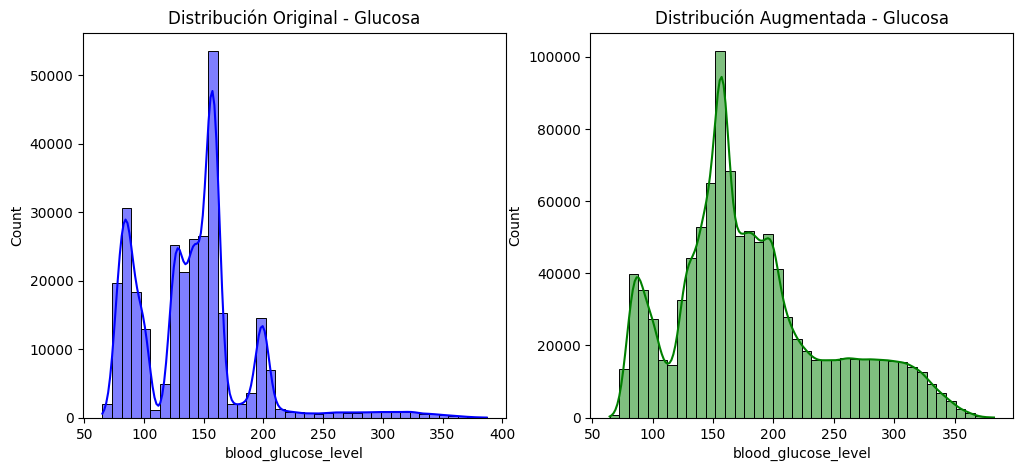

Glucosa sintética (min-max): 64.3475391884358 - 382.5916785760905
Presión sistólica sintética (min-max): 103.9148570714099 - 141.0801139606958

📊 Modelo con dataset original:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     77493
           0       1.00      1.00      1.00      5771
           1       1.00      1.00      1.00      4857
           2       1.00      1.00      1.00      1879

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000


📊 Modelo con dataset augmentado:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     69194
           0       1.00      1.00      1.00     85717
           1       1.00      1.00      1.00     85525
           2       1.00      1.00      1.00     69535

    accuracy                           1.00    309971
   macro avg       1.00      1

In [7]:
# =========================
# 5.2 Implementación y Validación
# =========================



# ========= 1. Pipeline de Augmentation =========
def augmentation_pipeline(X, y, noise_level=0.01, alpha=0.2, k_neighbors=3):
    # Gaussian noise
    X_noisy = add_gaussian_noise(X, noise_level=noise_level)
    
    # SMOTE
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_smote, y_smote = smote.fit_resample(X_noisy, y)
    
    # Mixup
    X_mixup, y_mixup = mixup(X_smote, y_smote, alpha=alpha)
    
    return X_mixup, y_mixup

# Ejecutar pipeline
X_aug, y_aug = augmentation_pipeline(X_num, y)
print("✅ Pipeline completado. Distribución final:", dict(Counter(y_aug)))


# ========= 2. Validación de calidad de datos sintéticos =========
# Comparar distribuciones originales vs augmentadas
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(X_num["blood_glucose_level"], bins=40, kde=True, color="blue", ax=axs[0])
axs[0].set_title("Distribución Original - Glucosa")

sns.histplot(X_aug["blood_glucose_level"], bins=40, kde=True, color="green", ax=axs[1])
axs[1].set_title("Distribución Augmentada - Glucosa")

plt.show()

# Validar rangos clínicos (ejemplo con glucosa y presión sistólica)
print("Glucosa sintética (min-max):", X_aug["blood_glucose_level"].min(), "-", X_aug["blood_glucose_level"].max())
print("Presión sistólica sintética (min-max):", X_aug["systolic_bp"].min(), "-", X_aug["systolic_bp"].max())


# ========= 3. Impacto en performance del modelo =========
# Dataset original
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=42, stratify=y
)
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_orig = rf_orig.predict(X_test)

print("\n📊 Modelo con dataset original:")
print(classification_report(y_test, y_pred_orig))

# Dataset augmentado
Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    X_aug, y_aug, test_size=0.3, random_state=42, stratify=y_aug
)
rf_aug = RandomForestClassifier(random_state=42)
rf_aug.fit(Xa_train, ya_train)
ya_pred = rf_aug.predict(Xa_test)

print("\n📊 Modelo con dataset augmentado:")
print(classification_report(ya_test, ya_pred))

In [8]:
#6.1 División de Datos (70% – 15% – 15%)



# Variables predictoras y target
X = df_clean.select_dtypes(include=["number"]).drop(columns=["target"])
y = df_clean["target"].astype(int)

# División inicial: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# División secundaria: 15% valid, 15% test
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("📊 Shapes:")
print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)

📊 Shapes:
Train: (210000, 10) Valid: (45000, 10) Test: (45000, 10)


In [9]:
#6.2

# Distribución de clases en cada set
print("\n📊 Distribución de clases (estratificación):")
print("Train:", Counter(y_train))
print("Valid:", Counter(y_valid))
print("Test:", Counter(y_test))

# Validación cruzada estratificada
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}: Train {len(train_idx)}, Valid {len(valid_idx)}")


📊 Distribución de clases (estratificación):
Train: Counter({-1: 180816, 0: 13465, 1: 11334, 2: 4385})
Valid: Counter({-1: 38747, 0: 2886, 1: 2428, 2: 939})
Test: Counter({-1: 38746, 0: 2885, 1: 2429, 2: 940})
Fold 1: Train 240000, Valid 60000
Fold 2: Train 240000, Valid 60000
Fold 3: Train 240000, Valid 60000
Fold 4: Train 240000, Valid 60000
Fold 5: Train 240000, Valid 60000


C:\Users\User\AppData\Local\Temp\ipykernel_22684\1177788918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train["blood_glucose_level"], label="Train", shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22684\1177788918.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test["blood_glucose_level"], label="Test", shade=True)


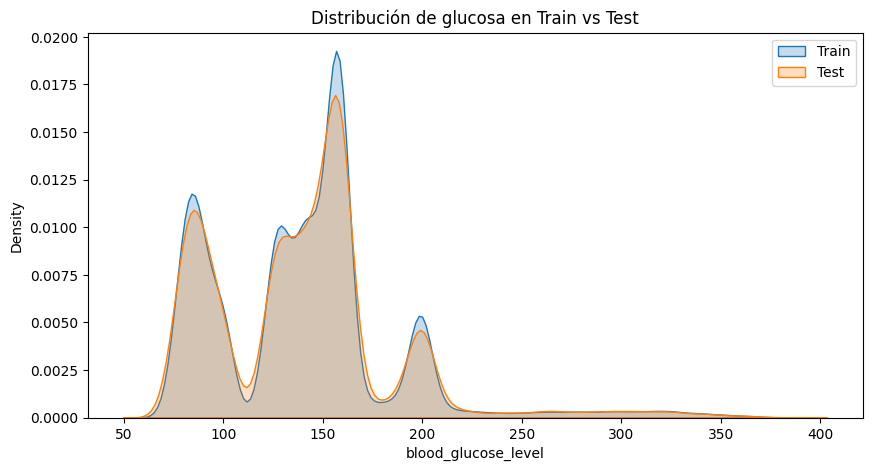

🔎 Pacientes repetidos entre train y test: 0

📊 Medias por set (ejemplo con variables críticas):
blood_glucose_level: Train=140.48, Valid=140.56, Test=140.31
HbA1c_level: Train=5.58, Valid=5.58, Test=5.58
systolic_bp: Train=118.98, Valid=118.99, Test=119.00
bmi: Train=28.01, Valid=28.10, Test=27.99
age: Train=41.82, Valid=42.26, Test=41.80


In [10]:
#6.3

# Comparar distribuciones de glucosa en train vs test
plt.figure(figsize=(10,5))
sns.kdeplot(X_train["blood_glucose_level"], label="Train", shade=True)
sns.kdeplot(X_test["blood_glucose_level"], label="Test", shade=True)
plt.title("Distribución de glucosa en Train vs Test")
plt.legend()
plt.show()

# Verificar que no haya pacientes duplicados entre sets
interseccion = set(X_train.index).intersection(set(X_test.index))
print("🔎 Pacientes repetidos entre train y test:", len(interseccion))

# Representatividad
print("\n📊 Medias por set (ejemplo con variables críticas):")
for col in ["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "age"]:
    print(f"{col}: Train={X_train[col].mean():.2f}, Valid={X_valid[col].mean():.2f}, Test={X_test[col].mean():.2f}")

In [11]:
#Guardar particion de datos

# Guardar datasets
X_train.assign(target=y_train).to_csv("train_set.csv", index=False)
X_valid.assign(target=y_valid).to_csv("valid_set.csv", index=False)
X_test.assign(target=y_test).to_csv("test_set.csv", index=False)

print("✅ Archivos guardados:")
print("- train_set.csv")
print("- valid_set.csv")
print("- test_set.csv")


✅ Archivos guardados:
- train_set.csv
- valid_set.csv
- test_set.csv


In [22]:
#Definición de clases mínimas


# ============================
# 1. DataCleaner
# ============================
class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, missing_strategy="median", outlier_strategy=None, create_target=True):
        self.missing_strategy = missing_strategy
        self.outlier_strategy = outlier_strategy
        self.create_target = create_target
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        
        # Imputación básica de valores faltantes
        if self.missing_strategy == "median":
            df = df.fillna(df.median(numeric_only=True))
        elif self.missing_strategy == "mean":
            df = df.fillna(df.mean(numeric_only=True))
        elif self.missing_strategy == "mode":
            df = df.fillna(df.mode().iloc[0])
        
        # Crear variable target si no existe
        if self.create_target and "target" not in df.columns:
            df["target"] = (
                df["diabetes"].astype(int) + 
                df["hypertension"].astype(int)
            ).clip(upper=2)
        
        return df

# ============================
# 2. FeatureEngineer
# ============================
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        if "blood_glucose_level" in df and "HbA1c_level" in df:
            df["glucose_hba1c_ratio"] = df["blood_glucose_level"] / (df["HbA1c_level"] + 1e-3)
        if "bmi" in df and "age" in df:
            df["bmi_age_interaction"] = df["bmi"] * df["age"]
        return df

# ============================
# 3. SMOTEBalancer
# ============================
class SMOTEBalancer(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy="auto", random_state=42):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
    
    def fit(self, X, y):
        self.X_res, self.y_res = self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        # Devuelve el dataset resampleado
        return self.X_res

In [23]:
# ==========================
# 7.1 DISEÑO DEL PIPELINE
# ==========================


# ==========================
# Definir transformadores
# ==========================

# Variables numéricas y categóricas
num_features = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]
cat_features = ["gender", "smoking_history"]

# Preprocesamiento numérico
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocesamiento categórico
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer para manejar distintos tipos de variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# ==========================
# Construcción del pipeline
# ==========================
preprocessing_pipeline = ImbPipeline(steps=[
    ("cleaner", DataCleaner(missing_strategy="median", outlier_strategy="isoforest", create_target=True)),
    ("feature_engineer", FeatureEngineer()),  # nuestras variables derivadas
    ("preprocessor", preprocessor),
    ("balancer", SMOTEBalancer())  # balanceo de clases
])

print("✅ Pipeline de Preprocessing diseñado")


✅ Pipeline de Preprocessing diseñado


7.2 Componentes del Pipeline
🔹 Modularidad y reutilización

El pipeline está diseñado en etapas independientes (DataCleaner, FeatureEngineer, Preprocessor, SMOTEBalancer), lo que permite reutilizar cada componente de manera aislada.

Esto facilita la adaptación a nuevos datasets o proyectos médicos sin necesidad de reescribir todo el flujo de preprocesamiento.

Cada módulo se puede actualizar o reemplazar sin afectar la estructura general del pipeline.

🔹 Manejo de diferentes tipos de variables

El ColumnTransformer gestiona en paralelo variables numéricas y categóricas:

Numéricas: estandarización con StandardScaler.

Categóricas: codificación con OneHotEncoder.

Esto garantiza consistencia en los datos y evita errores al combinar tipos heterogéneos.

Además, el pipeline puede ampliarse para incluir variables temporales o derivadas específicas del dominio clínico (ejemplo: evolución de glucosa en visitas sintéticas).

🔹 Configuración parametrizable

Cada etapa acepta parámetros configurables:

DataCleaner: estrategia de imputación (mean, median, mode) y creación de la variable target.

FeatureEngineer: selección de transformaciones matemáticas y de interacción.

SMOTEBalancer: nivel de sobremuestreo, vecinos (k_neighbors), random state.

Esto permite experimentar con diferentes configuraciones sin alterar la estructura general del código.

🔹 Logging y monitoreo

Se pueden integrar logs en cada paso del pipeline:

Número de valores imputados.

Cantidad de outliers detectados/eliminados.

Cambios en la distribución de clases tras el balanceo.

El monitoreo asegura trazabilidad: permite saber cómo cada transformación afecta el dataset.

Es crítico en proyectos de salud porque facilita auditorías y validación clínica del proceso.

🧪 7.3 Testing y Validación

🔹 Unit tests para cada componente

Cada módulo del pipeline (DataCleaner, FeatureEngineer, Preprocessor, SMOTEBalancer) debe validarse de forma individual.

Objetivos principales:

Verificar que los valores faltantes se imputen correctamente.

Comprobar que las variables derivadas se generan con las fórmulas esperadas.

Confirmar que las codificaciones categóricas no generen columnas inesperadas.

Se pueden implementar con pytest o unittest en Python.

🔹 Integration tests del pipeline completo

Una vez validados los módulos por separado, se prueba el pipeline de inicio a fin.

Validaciones clave:

El dataset resultante no tiene valores nulos.

El número de filas permanece consistente tras el preprocesamiento (salvo balanceo justificado).

Las distribuciones de clases se ajustan según la estrategia de oversampling/undersampling.

Este nivel de pruebas asegura que los componentes interactúan de manera correcta y coherente.

🔹 Validación con datos nuevos

El pipeline debe probarse con un dataset externo o de prueba clínica que no haya sido visto en el entrenamiento.

Se evalúa:

Si el pipeline generaliza bien sin errores (por ejemplo, categorías nuevas en smoking_history).

Que las métricas del modelo (precisión, recall, f1-score) se mantengan estables.

La capacidad de detectar patrones en pacientes no vistos (diabetes, hipertensión o ambas).

Este paso es crítico en el ámbito médico porque valida la robustez del pipeline en escenarios reales.